# Lab_01-2 Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### Context
#### Scaling
+ Min-Max Normalize
+ Standard Normalize

#### Imputation
+ Mean, Median, Mode Imputation
+ Iterative Imputation

#### Dimensionality Reduction
+ PCA(Principle Component Analysis)

#### Categorical Variable to Numeric Variable
+ Label Encoding
+ One-hot Encoding

"Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.

This approach may be generally referred to as fully conditional specification (FCS) or multivariate imputation by chained equations (MICE)."

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn


In [2]:
example_file = join('data', join('Hospital', 'train.csv'))
#join Ïù¥ Í±ç ÌååÏùº Í≤ΩÎ°úÏóêÏÑú \ÎùºÍ≥† ÏÉùÍ∞Å!

#### Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥

    train.csv - ÏùòÎ£åÍ∏∞Í¥ÄÏù¥ ÌèêÏóÖÌñàÎäîÏßÄ Ïó¨Î∂ÄÎ•º Ìè¨Ìï®ÌïòÏó¨ ÏµúÍ∑º 2Í∞úÎÖÑÏùò Ïû¨Î¨¥Ï†ïÎ≥¥ÏôÄ Î≥ëÏõê Í∏∞Î≥∏Ï†ïÎ≥¥ 
    test.csv - ÌèêÏóÖ Ïó¨Î∂ÄÎ•º Ï†úÏô∏ÌïòÍ≥† train.csvÏôÄ ÎèôÏùº 
    sample_submission.csv - inst_idÏôÄ openÍ≥º closeÎ•º ÏòàÏ∏°ÌïòÎäî OC ÎëêÍ∞úÏùò Ïó¥Î°ú Íµ¨ÏÑ±. OCÏùò Í∞íÏùÄ open ÏòàÏ∏°Ïùº Í≤ΩÏö∞ 1, close ÏòàÏ∏°Ïùº Í≤ΩÏö∞ 0.



    inst_id - Í∞Å ÌååÏùºÏóêÏÑúÏùò Î≥ëÏõê Í≥†Ïú† Î≤àÌò∏
    OC ‚Äì ÏòÅÏóÖ/ÌèêÏóÖ Î∂ÑÎ•ò, 2018ÎÖÑ ÌèêÏóÖÏùÄ 2017ÎÖÑ ÌèêÏóÖÏúºÎ°ú Í∞ÑÏ£ºÌï®
    sido ‚Äì Î≥ëÏõêÏùò Í¥ëÏó≠ ÏßÄÏó≠ Ï†ïÎ≥¥
    sgg ‚Äì Î≥ëÏõêÏùò ÏãúÍµ∞Íµ¨ ÏûêÎ£å
    openDate ‚Äì Î≥ëÏõê ÏÑ§Î¶ΩÏùº
    bedCount - Î≥ëÏõêÏù¥ Í∞ñÏ∂îÍ≥† ÏûàÎäî Î≥ëÏÉÅÏùò Ïàò
    instkind ‚Äì Î≥ëÏõê, ÏùòÏõê, ÏöîÏñëÎ≥ëÏõê, ÌïúÏùòÏõê, Ï¢ÖÌï©Î≥ëÏõê Îì± Î≥ëÏõêÏùò Ï¢ÖÎ•ò
    ¬∑        Ï¢ÖÌï©Î≥ëÏõê : ÏûÖÏõêÌôòÏûê 100Î™Ö Ïù¥ÏÉÅ ÏàòÏö© Í∞ÄÎä•
    ¬∑        Î≥ëÏõê : ÏûÖÏõê ÌôòÏûê 30Î™Ö Ïù¥ÏÉÅ 100Î™Ö ÎØ∏Îßå ÏàòÏö© Í∞ÄÎä•
    ¬∑        ÏùòÏõê : ÏûÖÏõê ÌôòÏûê 30Î™Ö Ïù¥Ìïò ÏàòÏö© Í∞ÄÎä•
    ¬∑        ÌïúÎ∞© Î≥ëÏõê(ÌïúÏùòÏõê) : Ïπ®Ïà†Í≥º ÌïúÏïΩÏúºÎ°ú ÏπòÎ£åÌïòÎäî ÏùòÎ£å Í∏∞Í¥Ä.  
    revenue1 ‚Äì Îß§Ï∂úÏï°, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    salescost1 ‚Äì Îß§Ï∂úÏõêÍ∞Ä, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    sga1 - ÌåêÎß§ÎπÑÏôÄ Í¥ÄÎ¶¨ÎπÑ, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    salary1 ‚Äì Í∏âÏó¨, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    noi1 ‚Äì ÏòÅÏóÖÏô∏ÏàòÏùµ, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    noe1 ‚Äì ÏòÅÏóÖÏô∏ÎπÑÏö©, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    Interest1 ‚Äì Ïù¥ÏûêÎπÑÏö©, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    ctax1 ‚Äì Î≤ïÏù∏ÏÑ∏ÎπÑÏö©, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    Profit1 ‚Äì ÎãπÍ∏∞ÏàúÏù¥Ïùµ, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    liquidAsset1 ‚Äì Ïú†ÎèôÏûêÏÇ∞, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    quickAsset1 ‚Äì ÎãπÏ¢åÏûêÏÇ∞, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    receivableS1 - ÎØ∏ÏàòÍ∏à(Îã®Í∏∞), 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    inventoryAsset1 ‚Äì Ïû¨Í≥†ÏûêÏÇ∞, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    nonCAsset1 ‚Äì ÎπÑÏú†ÎèôÏûêÏÇ∞, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    tanAsset1 ‚Äì Ïú†ÌòïÏûêÏÇ∞, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    OnonCAsset1 - Í∏∞ÌÉÄ ÎπÑÏú†ÎèôÏûêÏÇ∞, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    receivableL1 ‚Äì Ïû•Í∏∞ÎØ∏ÏàòÍ∏à, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    debt1 ‚Äì Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    liquidLiabilities1 ‚Äì Ïú†ÎèôÎ∂ÄÏ±Ñ, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    shortLoan1 ‚Äì Îã®Í∏∞Ï∞®ÏûÖÍ∏à, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    NCLiabilities1 ‚Äì ÎπÑÏú†ÎèôÎ∂ÄÏ±Ñ, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    longLoan1 ‚Äì Ïû•Í∏∞Ï∞®ÏûÖÍ∏à, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    netAsset1 ‚Äì ÏàúÏûêÏÇ∞Ï¥ùÍ≥Ñ, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    surplus1 ‚Äì Ïù¥ÏùµÏûâÏó¨Í∏à, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    revenue2 ‚Äì Îß§Ï∂úÏï°, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    salescost2 ‚Äì Îß§Ï∂úÏõêÍ∞Ä, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    sga2 - ÌåêÎß§ÎπÑÏôÄ Í¥ÄÎ¶¨ÎπÑ, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    salary2 ‚Äì Í∏âÏó¨, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    noi2 ‚Äì ÏòÅÏóÖÏô∏ÏàòÏùµ, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    noe2 ‚Äì ÏòÅÏóÖÏô∏ÎπÑÏö©, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    interest2 ‚Äì Ïù¥ÏûêÎπÑÏö©, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    ctax2 ‚Äì Î≤ïÏù∏ÏÑ∏ÎπÑÏö©, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    profit2 ‚Äì ÎãπÍ∏∞ÏàúÏù¥Ïùµ, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    liquidAsset2 ‚Äì Ïú†ÎèôÏûêÏÇ∞, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    quickAsset2 ‚Äì ÎãπÏ¢åÏûêÏÇ∞, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    receivableS2 - ÎØ∏ÏàòÍ∏à(Îã®Í∏∞), 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    inventoryAsset2 ‚Äì Ïû¨Í≥†ÏûêÏÇ∞, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    nonCAsset2 ‚Äì ÎπÑÏú†ÎèôÏûêÏÇ∞, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    tanAsset2 ‚Äì Ïú†ÌòïÏûêÏÇ∞, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    OnonCAsset2 - Í∏∞ÌÉÄ ÎπÑÏú†ÎèôÏûêÏÇ∞, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    receivableL2 ‚Äì Ïû•Í∏∞ÎØ∏ÏàòÍ∏à, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    Debt2 ‚Äì Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    liquidLiabilities2 ‚Äì Ïú†ÎèôÎ∂ÄÏ±Ñ, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    shortLoan2 ‚Äì Îã®Í∏∞Ï∞®ÏûÖÍ∏à, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    NCLiabilities2 ‚Äì ÎπÑÏú†ÎèôÎ∂ÄÏ±Ñ, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    longLoan2 ‚Äì Ïû•Í∏∞Ï∞®ÏûÖÍ∏à, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    netAsset2 ‚Äì ÏàúÏûêÏÇ∞Ï¥ùÍ≥Ñ, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    surplus2 ‚Äì Ïù¥ÏùµÏûâÏó¨Í∏à, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    employee1 ‚Äì Í≥†Ïö©Ìïú Ï¥ù ÏßÅÏõêÏùò Ïàò, 2017(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    employee2 ‚Äì Í≥†Ïö©Ìïú Ï¥ù ÏßÅÏõêÏùò Ïàò, 2016(ÌöåÍ≥ÑÎÖÑÎèÑ)ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÏùòÎØ∏Ìï®
    ownerChange ‚Äì ÎåÄÌëúÏûêÏùò Î≥ÄÎèô 

In [3]:
data = pd.read_csv(example_file)
label = data['OC']#OCÍ∞Ä ÏòàÏ∏°ÌïòÎ†§Îäî columnÍ∞íÏù¥Îã§
#ÏòàÏ∏° ÌïòÎ†§Îäî columnÏùÑ Ïñ¥ÎñªÍ≤å ÌåêÎã®ÌïòÎÉê?->Ïù¥Í≤ÉÏùÄ test dataÏôÄ train dataÏôÄ ÎπÑÍµêÌï¥ÏÑú,
#train dataÏóê ÏóÜÎäî columnÏùÑ Ï∞æÏúºÎ©¥ ÎêúÎã§!!

df.head() Ìï®ÏàòÎ°ú Îß®Ïïû 5Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [4]:
data.head()

inst_id    OC       sido  sgg  openDate  bedCount          instkind  \
0        1  open  choongnam   73  20071228     175.0  nursing_hospital   
1        3  open  gyeongnam   32  19970401     410.0  general_hospital   
2        4  open   gyeonggi   89  20161228     468.0  nursing_hospital   
3        7  open    incheon  141  20000814     353.0  general_hospital   
4        9  open  gyeongnam   32  20050901     196.0  general_hospital   

       revenue1   salescost1          sga1  ...         debt2  \
0  4.217530e+09          0.0  3.961135e+09  ...  7.589937e+08   
1           NaN          NaN           NaN  ...           NaN   
2  1.004522e+09  515483669.0  4.472197e+08  ...  0.000000e+00   
3  7.250734e+10          0.0  7.067740e+10  ...  3.775501e+10   
4  4.904354e+10          0.0  4.765605e+10  ...  5.143259e+10   

   liquidLiabilities2    shortLoan2  NCLiabilities2     longLoan2  \
0        2.228769e+08  0.000000e+00    5.361169e+08  3.900000e+08   
1                 NaN           NaN             NaN           NaN   
2        0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
3        1.701860e+10  9.219427e+09    2.073641e+10  1.510000e+10   
4        3.007259e+10  1.759375e+10    2.136001e+10  1.410803e+10   

      netAsset2      surplus2  employee1  employee2  ownerChange  
0  2.619290e+09  1.271224e+09       62.0       64.0         same  
1           NaN           NaN      801.0      813.0         same  
2  0.000000e+00  0.000000e+00      234.0        1.0         same  
3  1.295427e+10  7.740829e+09      663.0      663.0         same  
4  5.561941e+06  9.025550e+09      206.0      197.0         same  

[5 rows x 58 columns]

In [5]:
data.shape

(301, 58)

Pandas DataFrameÏóêÏÑú ÌäπÏ†ï Ïª¨ÎüºÏùÑ Ï†úÍ±∞ÌïòÎäî Î∞©Î≤ïÏùÄ df.drop(Ïª¨ÎüºÎ¶¨Ïä§Ìä∏) ÎòêÎäî del df[Ïª¨ÎüºÏù¥Î¶Ñ] ÏùÑ ÏÇ¨Ïö©Ìï¥ Ï†úÍ±∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [6]:
del data['OC']

Í∞ú/ÌèêÏóÖ Ïª¨ÎüºÏù¥ Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.

In [7]:
data.head()

inst_id       sido  sgg  openDate  bedCount          instkind  \
0        1  choongnam   73  20071228     175.0  nursing_hospital   
1        3  gyeongnam   32  19970401     410.0  general_hospital   
2        4   gyeonggi   89  20161228     468.0  nursing_hospital   
3        7    incheon  141  20000814     353.0  general_hospital   
4        9  gyeongnam   32  20050901     196.0  general_hospital   

       revenue1   salescost1          sga1       salary1  ...         debt2  \
0  4.217530e+09          0.0  3.961135e+09  2.033835e+09  ...  7.589937e+08   
1           NaN          NaN           NaN           NaN  ...           NaN   
2  1.004522e+09  515483669.0  4.472197e+08  2.964023e+08  ...  0.000000e+00   
3  7.250734e+10          0.0  7.067740e+10  3.178605e+10  ...  3.775501e+10   
4  4.904354e+10          0.0  4.765605e+10  2.446078e+10  ...  5.143259e+10   

   liquidLiabilities2    shortLoan2  NCLiabilities2     longLoan2  \
0        2.228769e+08  0.000000e+00    5.361169e+08  3.900000e+08   
1                 NaN           NaN             NaN           NaN   
2        0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
3        1.701860e+10  9.219427e+09    2.073641e+10  1.510000e+10   
4        3.007259e+10  1.759375e+10    2.136001e+10  1.410803e+10   

      netAsset2      surplus2  employee1  employee2  ownerChange  
0  2.619290e+09  1.271224e+09       62.0       64.0         same  
1           NaN           NaN      801.0      813.0         same  
2  0.000000e+00  0.000000e+00      234.0        1.0         same  
3  1.295427e+10  7.740829e+09      663.0      663.0         same  
4  5.561941e+06  9.025550e+09      206.0      197.0         same  

[5 rows x 57 columns]

df.describe() Ìï®ÏàòÎäî Í∞Å Î≥ÄÏàòÎ≥Ñ ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, ÏµúÎåÄ, ÏµúÏÜå, ÏÇ¨Î∂ÑÏúÑÏàò Îì±Ïùò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [8]:
data.describe()

inst_id         sgg      openDate    bedCount      revenue1  \
count  301.000000  301.000000  3.010000e+02  296.000000  2.930000e+02   
mean   219.056478   81.039867  2.005013e+07  145.709459  1.288175e+10   
std    121.234869   50.969714  8.893815e+04  118.923890  2.043543e+10   
min      1.000000    1.000000  1.978012e+07    0.000000  0.000000e+00   
25%    112.000000   37.000000  2.001102e+07   52.750000  3.252112e+09   
50%    230.000000   75.000000  2.007113e+07  136.500000  5.524218e+09   
75%    321.000000  123.000000  2.011102e+07  193.000000  1.274839e+10   
max    428.000000  178.000000  2.017061e+07  656.000000  1.510000e+11   

         salescost1          sga1       salary1          noi1          noe1  \
count  2.930000e+02  2.930000e+02  2.930000e+02  2.930000e+02  2.930000e+02   
mean   2.014903e+09  1.033244e+10  5.654115e+09  2.696151e+08  5.115870e+08   
std    7.460271e+09  1.493886e+10  8.083343e+09  8.023701e+08  1.060379e+09   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.758201e+09  1.626053e+09  8.217133e+06  8.013395e+07   
50%    2.104105e+08  4.684074e+09  2.659892e+09  4.363764e+07  1.831965e+08   
75%    9.105278e+08  1.077876e+10  6.363400e+09  2.050331e+08  4.203330e+08   
max    9.850332e+10  1.030000e+11  6.403559e+10  9.144171e+09  8.686380e+09   

       ...  receivableL2         debt2  liquidLiabilities2    shortLoan2  \
count  ...  2.930000e+02  2.930000e+02        2.930000e+02  2.930000e+02   
mean   ...  2.226700e+05  8.146026e+09        3.860584e+09  1.510050e+09   
std    ...  3.811496e+06  1.255800e+10        6.797242e+09  2.953412e+09   
min    ...  0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  1.283220e+09        2.855741e+08  0.000000e+00   
50%    ...  0.000000e+00  3.784553e+09        1.454050e+09  8.542549e+07   
75%    ...  0.000000e+00  8.465053e+09        4.364714e+09  1.567967e+09   
max    ...  6.524231e+07  8.508858e+10        6.846878e+10  1.759375e+10   

       NCLiabilities2     longLoan2     netAsset2      surplus2    employee1  \
count    2.930000e+02  2.930000e+02  2.930000e+02  2.930000e+02   291.000000   
mean     4.471247e+09  2.709979e+09  5.273919e+09  9.786279e+08   142.546392   
std      7.659580e+09  4.564001e+09  1.081259e+10  4.688798e+09   160.191073   
min      0.000000e+00  0.000000e+00 -2.014780e+10 -2.781507e+09     0.000000   
25%      2.557878e+07  0.000000e+00  1.017573e+09  0.000000e+00    53.500000   
50%      1.969747e+09  1.100000e+09  2.894970e+09  0.000000e+00    80.000000   
75%      4.905441e+09  3.360000e+09  5.370285e+09  1.014447e+08   181.500000   
max      5.150388e+10  3.256147e+10  1.250000e+11  6.852730e+10  1200.000000   

         employee2  
count   288.000000  
mean    134.326389  
std     151.061786  
min       0.000000  
25%      53.750000  
50%      79.000000  
75%     170.000000  
max    1200.000000  

[8 rows x 54 columns]

df.info() Ìï®ÏàòÎ°ú Í∞Å Î≥ÄÏàòÎì§Ïùò ÏûêÎ£åÌòïÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   sido                301 non-null    object 
 2   sgg                 301 non-null    int64  
 3   openDate            301 non-null    int64  
 4   bedCount            296 non-null    float64
 5   instkind            300 non-null    object 
 6   revenue1            293 non-null    float64
 7   salescost1          293 non-null    float64
 8   sga1                293 non-null    float64
 9   salary1             293 non-null    float64
 10  noi1                293 non-null    float64
 11  noe1                293 non-null    float64
 12  interest1           293 non-null    float64
 13  ctax1               293 non-null    float64
 14  profit1             293 non-null    float64
 15  liquidAsset1        293 non-null    float64
 16  quickAss

In [10]:
cat_columns = data.select_dtypes("object").columns# cat_columnsÎ•º ÏßÅÏ†ë ÎΩëÎäîÍ≤å ÏïÑÎãàÎùº, object('O')Î•º ÏïåÏïÑÏÑú ÎΩëÎäî ÏΩîÎìú
#X.select_dtypes("number").columns
num_columns = [c for c in data.columns if c not in cat_columns]

print('Categorical columns: \n{}\n\nNumeric columns: \n{}\n'.format(cat_columns, num_columns))

Categorical columns: 
Index(['sido', 'instkind', 'ownerChange'], dtype='object')

Numeric columns: 
['inst_id', 'sgg', 'openDate', 'bedCount', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1', 'employee2']



In [11]:
# DF.infoÏóêÏÑú Object typeÏùÑ Í∞ÄÏßÑ Ïª¨ÎüºÏùÄ Î™®Îëê Î≤îÏ£ºÌòï Î≥ÄÏàò
#cat_columns = ['sido', 'instkind', 'ownerChange'] 
#num_columns = [c for c in data.columns if c not in cat_columns]
#num_columnsÎäî data.columnsÎì§Ïùò Í∞í(c)Îì§Ïù¥ Îì§Ïñ¥Í∞ÑÎã§, Í∑ºÎç∞ Ïù¥Í≤å cat_columnsÏóê ÏóÜÎäî Í≤ΩÏö∞ÏóêÎßå Îì§Ïñ¥Í∞ÑÎã§
#print('Categorical Columns: \n{}\n\n Numeric Columns: \n{}\n'.format(cat_columns, num_columns))

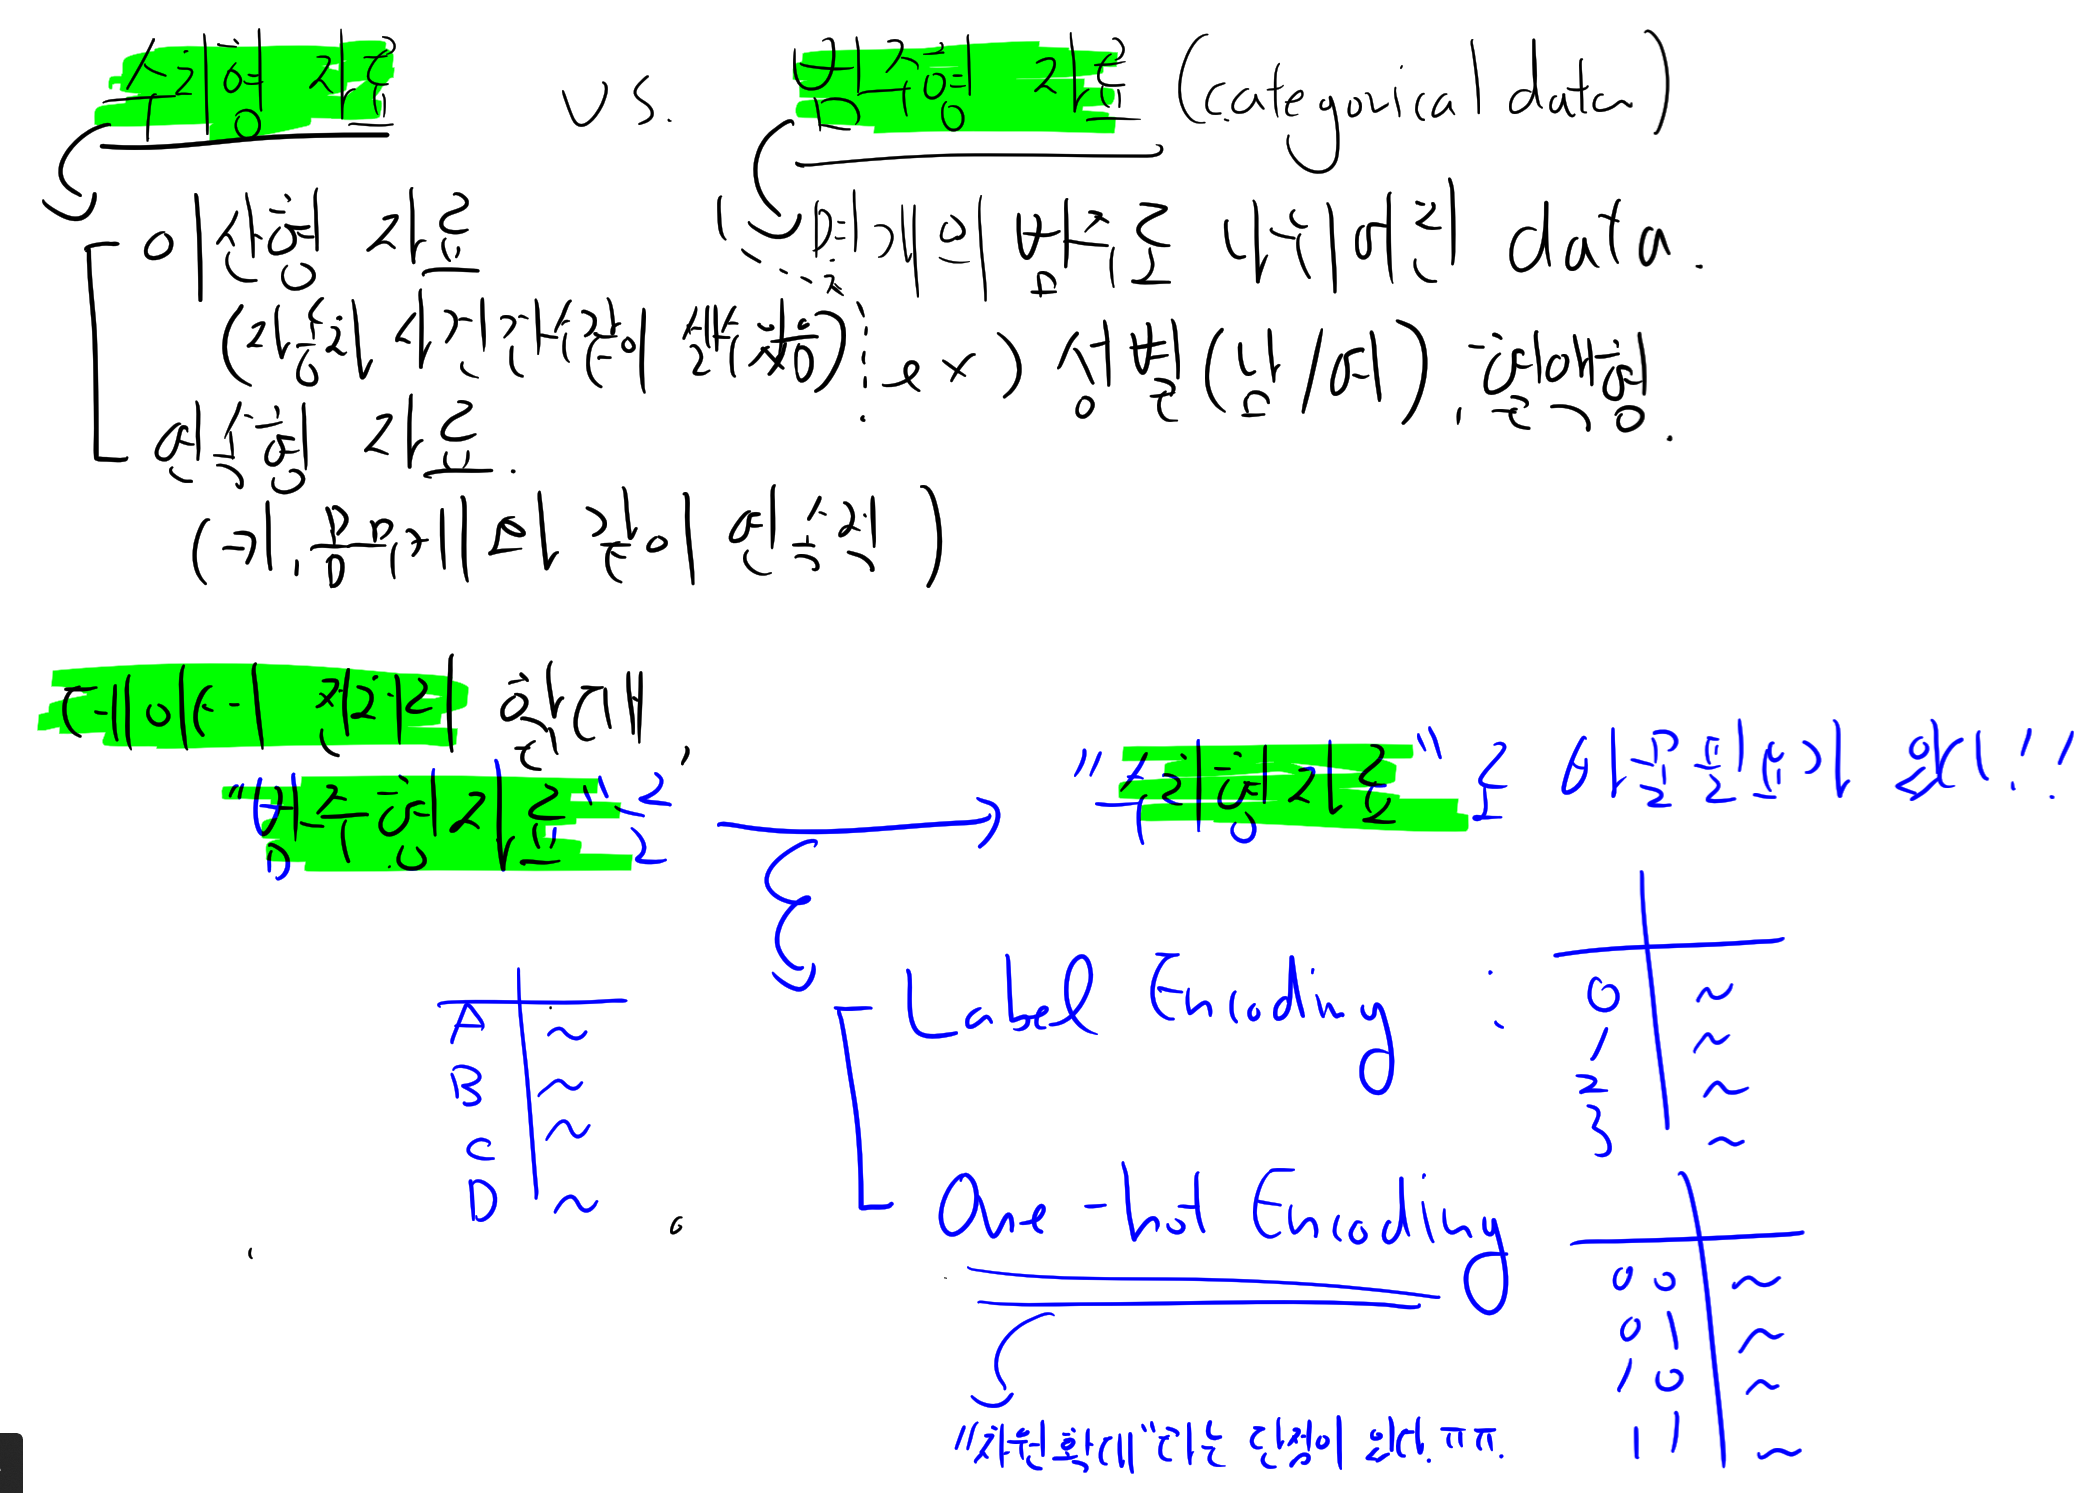

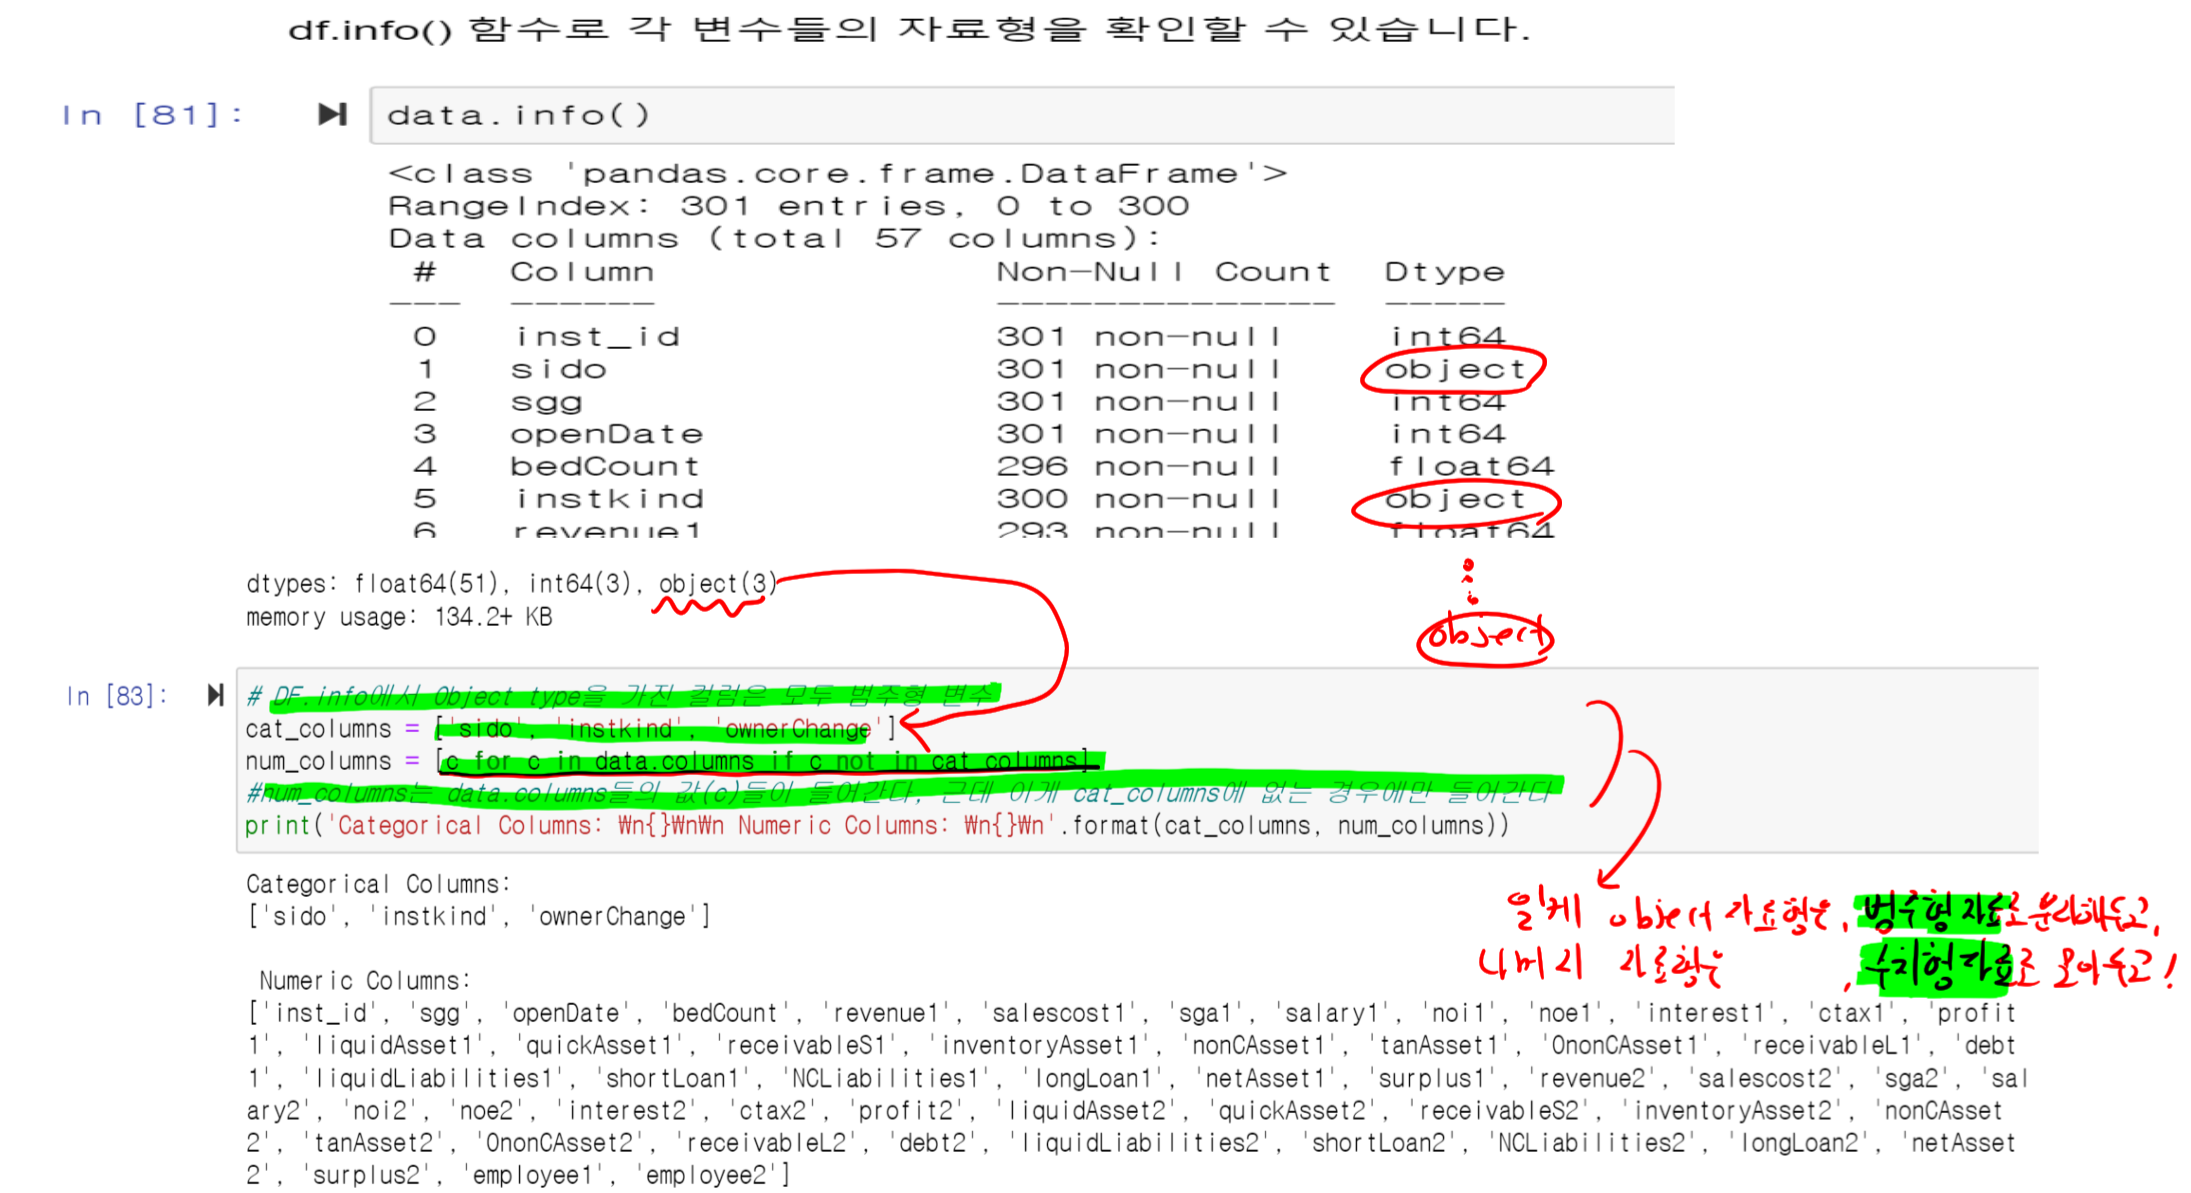

# Scaling
## Ïä§ÏºÄÏùºÎßÅÏùÑ Ïôú Ìï¥ÏïºÌï†ÍπåÏöî?
Î≥ÄÏàòÏùò ÌÅ¨Í∏∞Í∞Ä ÎÑàÎ¨¥ ÏûëÍ±∞ÎÇò, ÎÑàÎ¨¥ ÌÅ∞ Í≤ΩÏö∞ Ìï¥Îãπ Î≥ÄÏàòÍ∞Ä Target Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Î†•Ïù¥ Ï†úÎåÄÎ°ú ÌëúÌòÑÎêòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§.<br>
SklearnÏùò ÎåÄÌëúÏ†ÅÏù∏ Ïä§ÏºÄÏùºÎßÅ Ìï®ÏàòÎ°úÎäî ÌäπÏ†ï Î≥ÄÏàòÏùò ÏµúÎåÄ, ÏµúÏÜå Í∞íÏúºÎ°ú Ï°∞Ï†àÌïòÎäî Min-Max Ïä§ÏºÄÏùºÎßÅÍ≥º z-Ï†ïÍ∑úÌôîÎ•º Ïù¥Ïö©Ìïú Standard Ïä§ÏºÄÏùºÎßÅÏù¥ ÏûàÏäµÎãàÎã§.
### 1. Min-Max Scaling
- Min-Max Ïä§ÏºÄÏùºÎßÅÏùÑ ÌïòÎ©¥, Í∞íÏùò Î≤îÏúÑÍ∞Ä 0 ~ 1 ÏÇ¨Ïù¥Î°ú Î≥ÄÍ≤ΩÎê©ÎãàÎã§. <br> 
ÏàòÏãùÏùÑ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ïù¥Ìï¥Ìï¥Î≥¥Î©¥, XÏóê Ï°¥Ïû¨ÌïòÎäî Ïñ¥Îñ§ Í∞ÄÏû• ÏûëÏùÄ Í∞í x <sub>m</sub>Ïóê ÎåÄÌï¥ÏÑú x <sub>m</sub>Îäî Min(X)Ïùò Í∞íÍ≥º Í∞ôÏäµÎãàÎã§. <br>
Îî∞ÎùºÏÑú Ïä§ÏºÄÏùºÎßÅ ÌõÑ x<sub>m</sub>ÏùÄ 0Ïù¥ÎêòÍ≥†, XÏóê Ï°¥Ïû¨ÌïòÎäî Ïñ¥Îñ§ Í∞ÄÏû• ÌÅ∞ Í∞íx <sub>M</sub>ÏùÄ Î∂ÑÎ™®Ïùò ÏãùÍ≥º Í∞ôÏïÑÏßÄÎØÄÎ°ú 1Ïù¥Îê©ÎãàÎã§.

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : Îç∞Ïù¥ÌÑ∞\ ÏÖã $$
$$ x : Îç∞Ïù¥ÌÑ∞\ ÏÉòÌîå $$ 

SklearnÏóêÏÑú Min-Max ScalerÎäî preprocessing Ìå®ÌÇ§ÏßÄÏóê ÏûàÏäµÎãàÎã§.

#### 1) Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ïÏùòÌïòÍ∏∞

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler#minmaxÏôÄ standardÎëòÎã§ Î∂ÄÎ•º Ïàò ÏûàÎäî Í≤É Ï£ºÏùò!
mMscaler = MinMaxScaler()#MinMaxScalerÎäî Í∞ùÏ≤¥Ïù¥Îã§ Ïó¨Í∏∞ÏÑ†

#### 2) Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌäπÏßï Ï∞æÍ∏∞(Min, Max Í∞í)

In [13]:
numeric_data = data[num_columns].values #num_columnsÍ∞Ä ÌòÑÏû¨ ÏàòÏπòÌòï ÏûêÎ£å!
#valuesÎ°ú ÎπºÏò§Î©¥ÏÑú, numpyÏûêÎ£åÎ°ú ÎÑòÏñ¥Ïò®Îã§!!, Ïù¥Í≤ÉÏùÑ numeric dataÏóêÎã§ Ï†ÄÏû•
mMscaler.fit(numeric_data)#dataÎ•º modelÏóê ÌïôÏäµÏãúÌÇ®Îã§Îäî Í≤ÉÏùÑ fitting
#Í∑∏Î¶¨Í≥†, scaling ÌïòÎ©¥ÏÑú Í≤∞Ï∏°ÏπòÎì§ÏùÄ(NaN)Í∑∏ÎÉ• ÎÇ†ÎùºÍ∞ÑÎã§. Í∑∏Îü¨ÎØÄÎ°ú, Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Î•º Ìï¥Ï£ºÍ≥† Í∞ÄÏû• ÎßàÏßÄÎßâÏóê
#scalingÏùÑ ÌïúÎã§ ÏÉùÍ∞Å!

MinMaxScaler()

#### 3) Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò

In [14]:
mMscaled_data = mMscaler.transform(numeric_data)
mMscaled_data = pd.DataFrame(mMscaled_data, columns=num_columns)

#### 4) Í≤∞Í≥º ÏÇ¥Ìé¥Î≥¥Í∏∞

In [15]:
data[num_columns].head()

inst_id  sgg  openDate  bedCount      revenue1   salescost1          sga1  \
0        1   73  20071228     175.0  4.217530e+09          0.0  3.961135e+09   
1        3   32  19970401     410.0           NaN          NaN           NaN   
2        4   89  20161228     468.0  1.004522e+09  515483669.0  4.472197e+08   
3        7  141  20000814     353.0  7.250734e+10          0.0  7.067740e+10   
4        9   32  20050901     196.0  4.904354e+10          0.0  4.765605e+10   

        salary1         noi1          noe1  ...  receivableL2         debt2  \
0  2.033835e+09   15652441.0  1.523624e+07  ...           0.0  7.589937e+08   
1           NaN          NaN           NaN  ...           NaN           NaN   
2  2.964023e+08      76156.0  3.000000e+04  ...           0.0  0.000000e+00   
3  3.178605e+10  506223059.0  1.259568e+09  ...           0.0  3.775501e+10   
4  2.446078e+10  112352259.0  1.419089e+09  ...           0.0  5.143259e+10   

   liquidLiabilities2    shortLoan2  NCLiabilities2     longLoan2  \
0        2.228769e+08  0.000000e+00    5.361169e+08  3.900000e+08   
1                 NaN           NaN             NaN           NaN   
2        0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
3        1.701860e+10  9.219427e+09    2.073641e+10  1.510000e+10   
4        3.007259e+10  1.759375e+10    2.136001e+10  1.410803e+10   

      netAsset2      surplus2  employee1  employee2  
0  2.619290e+09  1.271224e+09       62.0       64.0  
1           NaN           NaN      801.0      813.0  
2  0.000000e+00  0.000000e+00      234.0        1.0  
3  1.295427e+10  7.740829e+09      663.0      663.0  
4  5.561941e+06  9.025550e+09      206.0      197.0  

[5 rows x 54 columns]

In [16]:
mMscaled_data.head()

inst_id       sgg  openDate  bedCount  revenue1  salescost1      sga1  \
0  0.000000  0.406780  0.745497  0.266768  0.027931    0.000000  0.038458   
1  0.004684  0.175141  0.487286  0.625000       NaN         NaN       NaN   
2  0.007026  0.497175  0.975981  0.713415  0.006652    0.005233  0.004342   
3  0.014052  0.790960  0.565172  0.538110  0.480181    0.000000  0.686188   
4  0.018735  0.175141  0.693441  0.298780  0.324792    0.000000  0.462680   

    salary1      noi1      noe1  ...  receivableL2     debt2  \
0  0.031761  0.001712  0.001754  ...           0.0  0.008920   
1       NaN       NaN       NaN  ...           NaN       NaN   
2  0.004629  0.000008  0.000003  ...           0.0  0.000000   
3  0.496381  0.055360  0.145005  ...           0.0  0.443714   
4  0.381987  0.012287  0.163369  ...           0.0  0.604459   

   liquidLiabilities2  shortLoan2  NCLiabilities2  longLoan2  netAsset2  \
0            0.003255    0.000000        0.010409   0.011977   0.156855   
1                 NaN         NaN             NaN        NaN        NaN   
2            0.000000    0.000000        0.000000   0.000000   0.138809   
3            0.248560    0.524017        0.402618   0.463738   0.228058   
4            0.439216    1.000000        0.414726   0.433274   0.138847   

   surplus2  employee1  employee2  
0  0.056834   0.051667   0.053333  
1       NaN   0.667500   0.677500  
2  0.039006   0.195000   0.000833  
3  0.147560   0.552500   0.552500  
4  0.165576   0.171667   0.164167  

[5 rows x 54 columns]

## 2. Standard Scaling
Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Ìôî ÏãúÏºú Ïä§ÏºÄÏùºÎßÅÏùÑ ÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§. `z-score Ï†ïÍ∑úÌôî` ÎùºÍ≥†ÎèÑ Ìï©ÎãàÎã§.<br>
Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†Ïù¥ 0, ÌëúÏ§Ä Ìé∏Ï∞®Í∞Ä 1Ïù¥ ÎêòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅ Ìï©ÎãàÎã§.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : Îç∞Ïù¥ÌÑ∞Ïùò\ ÌèâÍ∑†, mean(X) $$
$$ \sigma : Îç∞Ïù¥ÌÑ∞Ïùò\ ÌëúÏ§ÄÌé∏Ï∞®, std(X)$$
$$ X : Îç∞Ïù¥ÌÑ∞\ ÏÖã $$
$$ x : Îç∞Ïù¥ÌÑ∞\ ÏÉòÌîå $$
SklearnÏóêÏÑú Standard ScalerÎäî preprocessing Ìå®ÌÇ§ÏßÄÏóê ÏûàÏäµÎãàÎã§.

#### 1) Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ïÏùòÌïòÍ∏∞

In [17]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

#### 2) Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌäπÏßï Ï∞æÍ∏∞(Mean, Std Í∞í)

In [18]:
sdscaler.fit(numeric_data)

StandardScaler()

fit()Ïù¥ÎûÄ Ï†ïÍ∑úÌôî Ï¶â, ÌÜµÍ≥ÑÏóêÏÑú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÎßåÎì§Í≤å ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ùë• Í∞íÏóêÏÑú ÌèâÍ∑†ÏùÑ ÎπºÍ≥† Í∑∏ Í∞íÏùÑ Îã§Ïãú ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàÑÏñ¥Ï£ºÎäî ÏûëÏóÖÏùÑ ÌïòÎäîÎç∞ Ïù¥ ÏûëÏóÖÏùÑ ÌïòÍ∏∞ ÏúÑÌï¥ ÌèâÍ∑† ùúáÍ≥º  ÌëúÏ§ÄÌé∏Ï∞® ùúéÎ•º Í≥ÑÏÇ∞ÌïòÎäî ÏûëÏóÖÏù¥ fit() Ïù¥Í≥†, transform()ÏùÄ Ï†ïÍ∑úÌôî ÏûëÏóÖÏùÑ Ìï¥Ï£ºÎäî Í≤ÉÏûÖÎãàÎã§.

#### 3) Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò

In [19]:
sdscaled_data = sdscaler.transform(numeric_data)
sdscaled_data = pd.DataFrame(sdscaled_data, columns=num_columns)

#### 4) Í≤∞Í≥º ÏÇ¥Ìé¥Î≥¥Í∏∞

In [20]:
data[num_columns].head()

inst_id  sgg  openDate  bedCount      revenue1   salescost1          sga1  \
0        1   73  20071228     175.0  4.217530e+09          0.0  3.961135e+09   
1        3   32  19970401     410.0           NaN          NaN           NaN   
2        4   89  20161228     468.0  1.004522e+09  515483669.0  4.472197e+08   
3        7  141  20000814     353.0  7.250734e+10          0.0  7.067740e+10   
4        9   32  20050901     196.0  4.904354e+10          0.0  4.765605e+10   

        salary1         noi1          noe1  ...  receivableL2         debt2  \
0  2.033835e+09   15652441.0  1.523624e+07  ...           0.0  7.589937e+08   
1           NaN          NaN           NaN  ...           NaN           NaN   
2  2.964023e+08      76156.0  3.000000e+04  ...           0.0  0.000000e+00   
3  3.178605e+10  506223059.0  1.259568e+09  ...           0.0  3.775501e+10   
4  2.446078e+10  112352259.0  1.419089e+09  ...           0.0  5.143259e+10   

   liquidLiabilities2    shortLoan2  NCLiabilities2     longLoan2  \
0        2.228769e+08  0.000000e+00    5.361169e+08  3.900000e+08   
1                 NaN           NaN             NaN           NaN   
2        0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
3        1.701860e+10  9.219427e+09    2.073641e+10  1.510000e+10   
4        3.007259e+10  1.759375e+10    2.136001e+10  1.410803e+10   

      netAsset2      surplus2  employee1  employee2  
0  2.619290e+09  1.271224e+09       62.0       64.0  
1           NaN           NaN      801.0      813.0  
2  0.000000e+00  0.000000e+00      234.0        1.0  
3  1.295427e+10  7.740829e+09      663.0      663.0  
4  5.561941e+06  9.025550e+09      206.0      197.0  

[5 rows x 54 columns]

In [21]:
data[num_columns].describe()

inst_id         sgg      openDate    bedCount      revenue1  \
count  301.000000  301.000000  3.010000e+02  296.000000  2.930000e+02   
mean   219.056478   81.039867  2.005013e+07  145.709459  1.288175e+10   
std    121.234869   50.969714  8.893815e+04  118.923890  2.043543e+10   
min      1.000000    1.000000  1.978012e+07    0.000000  0.000000e+00   
25%    112.000000   37.000000  2.001102e+07   52.750000  3.252112e+09   
50%    230.000000   75.000000  2.007113e+07  136.500000  5.524218e+09   
75%    321.000000  123.000000  2.011102e+07  193.000000  1.274839e+10   
max    428.000000  178.000000  2.017061e+07  656.000000  1.510000e+11   

         salescost1          sga1       salary1          noi1          noe1  \
count  2.930000e+02  2.930000e+02  2.930000e+02  2.930000e+02  2.930000e+02   
mean   2.014903e+09  1.033244e+10  5.654115e+09  2.696151e+08  5.115870e+08   
std    7.460271e+09  1.493886e+10  8.083343e+09  8.023701e+08  1.060379e+09   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.758201e+09  1.626053e+09  8.217133e+06  8.013395e+07   
50%    2.104105e+08  4.684074e+09  2.659892e+09  4.363764e+07  1.831965e+08   
75%    9.105278e+08  1.077876e+10  6.363400e+09  2.050331e+08  4.203330e+08   
max    9.850332e+10  1.030000e+11  6.403559e+10  9.144171e+09  8.686380e+09   

       ...  receivableL2         debt2  liquidLiabilities2    shortLoan2  \
count  ...  2.930000e+02  2.930000e+02        2.930000e+02  2.930000e+02   
mean   ...  2.226700e+05  8.146026e+09        3.860584e+09  1.510050e+09   
std    ...  3.811496e+06  1.255800e+10        6.797242e+09  2.953412e+09   
min    ...  0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  1.283220e+09        2.855741e+08  0.000000e+00   
50%    ...  0.000000e+00  3.784553e+09        1.454050e+09  8.542549e+07   
75%    ...  0.000000e+00  8.465053e+09        4.364714e+09  1.567967e+09   
max    ...  6.524231e+07  8.508858e+10        6.846878e+10  1.759375e+10   

       NCLiabilities2     longLoan2     netAsset2      surplus2    employee1  \
count    2.930000e+02  2.930000e+02  2.930000e+02  2.930000e+02   291.000000   
mean     4.471247e+09  2.709979e+09  5.273919e+09  9.786279e+08   142.546392   
std      7.659580e+09  4.564001e+09  1.081259e+10  4.688798e+09   160.191073   
min      0.000000e+00  0.000000e+00 -2.014780e+10 -2.781507e+09     0.000000   
25%      2.557878e+07  0.000000e+00  1.017573e+09  0.000000e+00    53.500000   
50%      1.969747e+09  1.100000e+09  2.894970e+09  0.000000e+00    80.000000   
75%      4.905441e+09  3.360000e+09  5.370285e+09  1.014447e+08   181.500000   
max      5.150388e+10  3.256147e+10  1.250000e+11  6.852730e+10  1200.000000   

         employee2  
count   288.000000  
mean    134.326389  
std     151.061786  
min       0.000000  
25%      53.750000  
50%      79.000000  
75%     170.000000  
max    1200.000000  

[8 rows x 54 columns]

In [22]:
sdscaled_data.head()

inst_id       sgg  openDate  bedCount  revenue1  salescost1      sga1  \
0 -1.801624 -0.158001  0.237663  0.246714 -0.424705   -0.270546 -0.427222   
1 -1.785099 -0.963740 -0.897900  2.226114       NaN         NaN       NaN   
2 -1.776837  0.156434  1.251288  2.714647 -0.582202   -0.201331 -0.662844   
3 -1.752050  1.178346 -0.555374  1.746004  2.922747   -0.270546  4.046372   
4 -1.735526 -0.963740  0.008731  0.423596  1.772591   -0.270546  2.502698   

    salary1      noi1      noe1  ...  receivableL2     debt2  \
0 -0.448635 -0.317057 -0.468889  ...     -0.058521 -0.589240   
1       NaN       NaN       NaN  ...           NaN       NaN   
2 -0.663943 -0.336503 -0.483254  ...     -0.058521 -0.649782   
3  3.238344  0.295391  0.706596  ...     -0.058521  2.361813   
4  2.330576 -0.196333  0.857292  ...     -0.058521  3.452830   

   liquidLiabilities2  shortLoan2  NCLiabilities2  longLoan2  netAsset2  \
0           -0.536090   -0.512165       -0.514632  -0.509191  -0.245933   
1                 NaN         NaN             NaN        NaN        NaN   
2           -0.568935   -0.512165       -0.584744  -0.594788  -0.488592   
3            1.939099    2.614795        2.127139   2.719372   0.711531   
4            3.862868    5.455120        2.208692   2.501653  -0.488076   

   surplus2  employee1  employee2  
0  0.062510  -0.503681  -0.466358  
1       NaN   4.117507   4.500509  
2 -0.209073   0.571887  -0.884131  
3  1.444671   3.254552   3.505810  
4  1.719138   0.396794   0.415609  

[5 rows x 54 columns]

In [23]:
sdscaled_data.describe()

inst_id           sgg      openDate      bedCount      revenue1  \
count  3.010000e+02  3.010000e+02  3.010000e+02  2.960000e+02  2.930000e+02   
mean   1.888486e-16 -9.442428e-17  9.607671e-15  4.800964e-17  3.031326e-17   
std    1.001665e+00  1.001665e+00  1.001665e+00  1.001693e+00  1.001711e+00   
min   -1.801624e+00 -1.572957e+00 -3.040893e+00 -1.227308e+00 -6.314418e-01   
25%   -8.845208e-01 -8.654788e-01 -4.404626e-01 -7.829956e-01 -4.720287e-01   
50%    9.041743e-02 -1.186965e-01  2.365146e-01 -7.757109e-02 -3.606538e-01   
75%    8.422765e-01  8.246075e-01  6.858317e-01  3.983273e-01 -6.536816e-03   
max    1.726331e+00  1.905477e+00  1.356919e+00  4.298167e+00  6.770326e+00   

         salescost1          sga1       salary1          noi1          noe1  \
count  2.930000e+02  2.930000e+02  2.930000e+02  2.930000e+02  2.930000e+02   
mean   1.818795e-17 -2.425061e-17 -2.425061e-17 -4.850121e-17 -1.515663e-17   
std    1.001711e+00  1.001711e+00  1.001711e+00  1.001711e+00  1.001711e+00   
min   -2.705465e-01 -6.928316e-01 -7.006740e-01 -3.365983e-01 -4.832821e-01   
25%   -2.705465e-01 -5.078832e-01 -4.991689e-01 -3.263397e-01 -4.075817e-01   
50%   -2.422941e-01 -3.787456e-01 -3.710526e-01 -2.821193e-01 -3.102214e-01   
75%   -1.482874e-01  2.992775e-02  8.789668e-02 -8.062681e-02 -8.620512e-02   
max    1.295576e+01  6.213733e+00  7.234799e+00  1.107935e+01  7.722500e+00   

       ...  receivableL2       debt2  liquidLiabilities2  shortLoan2  \
count  ...    293.000000  293.000000        2.930000e+02  293.000000   
mean   ...      0.000000    0.000000        9.700242e-17    0.000000   
std    ...      1.001711    1.001711        1.001711e+00    1.001711   
min    ...     -0.058521   -0.649782       -5.689349e-01   -0.512165   
25%    ...     -0.058521   -0.547424       -5.268498e-01   -0.512165   
50%    ...     -0.058521   -0.347901       -3.546513e-01   -0.483191   
75%    ...     -0.058521    0.025448        7.429374e-02    0.019644   
max    ...     17.088007    6.137460        9.521322e+00    5.455120   

       NCLiabilities2     longLoan2     netAsset2      surplus2     employee1  \
count    2.930000e+02  2.930000e+02  2.930000e+02  2.930000e+02  2.910000e+02   
mean    -3.637591e-17 -4.850121e-17 -6.062651e-18 -6.062651e-18  7.325183e-17   
std      1.001711e+00  1.001711e+00  1.001711e+00  1.001711e+00  1.001723e+00   
min     -5.847444e-01 -5.947885e-01 -2.355144e+00 -8.033120e-01 -8.913852e-01   
25%     -5.813993e-01 -5.947885e-01 -3.943206e-01 -2.090732e-01 -5.568337e-01   
50%     -3.271433e-01 -3.533595e-01 -2.203929e-01 -2.090732e-01 -3.911213e-01   
75%      5.678339e-02  1.426672e-01  8.927612e-03 -1.874007e-01  2.435886e-01   
max      6.150873e+00  6.551831e+00  1.109178e+01  1.443104e+01  6.612573e+00   

          employee2  
count  2.880000e+02  
mean  -1.233581e-17  
std    1.001741e+00  
min   -8.907627e-01  
25%   -5.343287e-01  
50%   -3.668876e-01  
75%    2.365635e-01  
max    7.066834e+00  

[8 rows x 54 columns]

Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Î≥ÄÏàòÎ≥ÑÎ°ú ÏÑúÎ°ú Îã§Î•∏ ÌèâÍ∑†Í≥º ÌëúÏ§Ä Ìé∏Ï∞® Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏóàÏäµÎãàÎã§.<br>
Standard Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Î©¥, ÌèâÍ∑†Ïù¥ 0 ÌëúÏ§ÄÌé∏Ï∞®(std)Í∞Ä 1Ïù¥ ÎêòÏóàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

# Imputation
## ÎåÄÌëú Í∞íÏùÑ ÏÇ¨Ïö©Ìïú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
Ï†ïÌòï Îç∞Ïù¥ÌÑ∞Î•º Îã§Î£®Îã§Î≥¥Î©¥, Í∞íÏù¥ NaN(Not a Number or Null)ÏúºÎ°ú ÎêòÏñ¥ÏûàÎäî Í≤ΩÏö∞Í∞Ä ÏûàÏäµÎãàÎã§. Ïù¥Îü¨Ìïú Í∞íÏùÑ Í≤∞Ï∏°ÏπòÎùº ÌïòÎ©∞, <br>
Í∞ÄÏû• Í∞ÑÎã®Ìïú Î∞©Î≤ïÏúºÎ°ú ÌèâÍ∑†Ïù¥ÎÇò Ï§ëÍ∞ÑÍ∞í ÎòêÎäî ÏµúÎπàÍ∞í Í∞ôÏùÄ Î≥ÄÏàòÏùò ÎåÄÌëúÍ∞íÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§. <br><br>

Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏ÌïòÎäî Î∞©Î≤ïÏúºÎ°ú missingno ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò `matrix()` Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò PandasÏùò `isna() + sum()` Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

<AxesSubplot:>

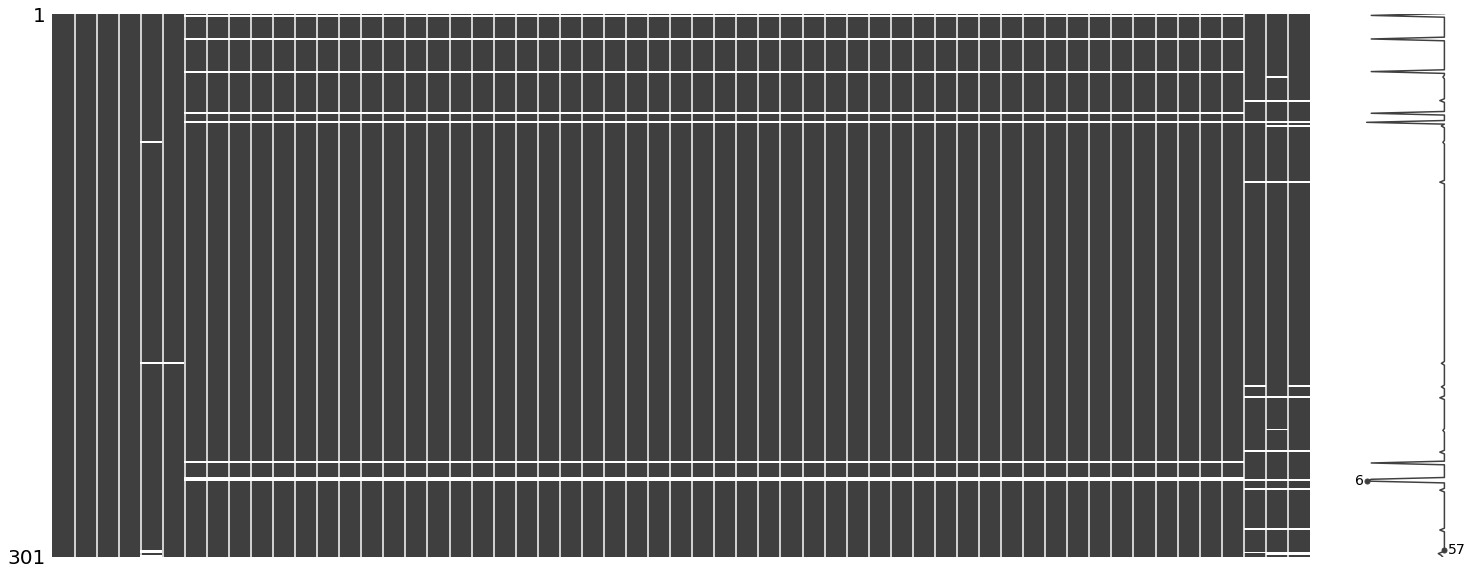

In [24]:
import missingno as msno

msno.matrix(data)

In [25]:
pd.isna(data) #Í∞ÅÏõêÏÜåÎì§Ïóê ÎåÄÌï¥ÏÑú Í∞ÅÍ∞Å nullÍ∞íÏù∏ÏßÄ ÏïÑÎãåÏßÄÍ∞Ä ÎÇòÏò®Îã§

inst_id   sido    sgg  openDate  bedCount  instkind  revenue1  \
0      False  False  False     False     False     False     False   
1      False  False  False     False     False     False      True   
2      False  False  False     False     False     False     False   
3      False  False  False     False     False     False     False   
4      False  False  False     False     False     False     False   
..       ...    ...    ...       ...       ...       ...       ...   
296    False  False  False     False     False     False     False   
297    False  False  False     False      True     False     False   
298    False  False  False     False      True     False     False   
299    False  False  False     False     False     False     False   
300    False  False  False     False      True     False     False   

     salescost1   sga1  salary1  ...  debt2  liquidLiabilities2  shortLoan2  \
0         False  False    False  ...  False               False       False   
1          True   True     True  ...   True                True        True   
2         False  False    False  ...  False               False       False   
3         False  False    False  ...  False               False       False   
4         False  False    False  ...  False               False       False   
..          ...    ...      ...  ...    ...                 ...         ...   
296       False  False    False  ...  False               False       False   
297       False  False    False  ...  False               False       False   
298       False  False    False  ...  False               False       False   
299       False  False    False  ...  False               False       False   
300       False  False    False  ...  False               False       False   

     NCLiabilities2  longLoan2  netAsset2  surplus2  employee1  employee2  \
0             False      False      False     False      False      False   
1              True       True       True      True      False      False   
2             False      False      False     False      False      False   
3             False      False      False     False      False      False   
4             False      False      False     False      False      False   
..              ...        ...        ...       ...        ...        ...   
296           False      False      False     False      False      False   
297           False      False      False     False      False      False   
298           False      False      False     False       True       True   
299           False      False      False     False      False       True   
300           False      False      False     False      False      False   

     ownerChange  
0          False  
1          False  
2          False  
3          False  
4          False  
..           ...  
296        False  
297        False  
298         True  
299         True  
300        False  

[301 rows x 57 columns]

In [26]:
pd.isna(data).sum()

inst_id                0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8
liquidAsset2           8


In [27]:
pd.isna(data).sum().sum()#Ïù¥Í±¥ Í±ç null Í∞íÏùò Ï†ÑÏ≤¥ Í∞úÏàòÏù¥Îã§

425

In [28]:
data.head()

inst_id       sido  sgg  openDate  bedCount          instkind  \
0        1  choongnam   73  20071228     175.0  nursing_hospital   
1        3  gyeongnam   32  19970401     410.0  general_hospital   
2        4   gyeonggi   89  20161228     468.0  nursing_hospital   
3        7    incheon  141  20000814     353.0  general_hospital   
4        9  gyeongnam   32  20050901     196.0  general_hospital   

       revenue1   salescost1          sga1       salary1  ...         debt2  \
0  4.217530e+09          0.0  3.961135e+09  2.033835e+09  ...  7.589937e+08   
1           NaN          NaN           NaN           NaN  ...           NaN   
2  1.004522e+09  515483669.0  4.472197e+08  2.964023e+08  ...  0.000000e+00   
3  7.250734e+10          0.0  7.067740e+10  3.178605e+10  ...  3.775501e+10   
4  4.904354e+10          0.0  4.765605e+10  2.446078e+10  ...  5.143259e+10   

   liquidLiabilities2    shortLoan2  NCLiabilities2     longLoan2  \
0        2.228769e+08  0.000000e+00    5.361169e+08  3.900000e+08   
1                 NaN           NaN             NaN           NaN   
2        0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
3        1.701860e+10  9.219427e+09    2.073641e+10  1.510000e+10   
4        3.007259e+10  1.759375e+10    2.136001e+10  1.410803e+10   

      netAsset2      surplus2  employee1  employee2  ownerChange  
0  2.619290e+09  1.271224e+09       62.0       64.0         same  
1           NaN           NaN      801.0      813.0         same  
2  0.000000e+00  0.000000e+00      234.0        1.0         same  
3  1.295427e+10  7.740829e+09      663.0      663.0         same  
4  5.561941e+06  9.025550e+09      206.0      197.0         same  

[5 rows x 57 columns]

### 1. Mean(ÌèâÍ∑†)

ÌôïÎ•† Ïù¥Î°†Í≥º ÌÜµÍ≥Ñ Í¥ÄÏ†êÏóêÏÑú (Î™®)ÌèâÍ∑† ÎòêÎäî Í∏∞ÎåìÍ∞íÏùÄ Ï§ëÏã¨Ïóê ÎåÄÌïú Í≤ΩÌñ•ÏÑ±ÏùÑ Ïïå Ïàò ÏûàÎäî Ï≤ôÎèÑÏûÖÎãàÎã§.<br>
ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌèâÍ∑†Ïù¥ÎùºÍ≥† Î∂ÄÎ•¥Îäî Í≤ÉÏúºÎ°ú ÏÇ∞Ïà† ÌèâÍ∑†Ïù¥ÎùºÍ≥† ÌïòÍ≥†, Ïù¥ ÌèâÍ∑†ÏùÄ ÌëúÎ≥∏ ÌèâÍ∑†Ïù¥ÎùºÍ≥†ÎèÑ Ìï©ÎãàÎã§.<br>
ÌèâÍ∑†ÏùÄ Î™®Îì† Í¥ÄÏ∏°ÏπòÏùò Í∞íÏùÑ Î™®Îëê Î∞òÏòÅÌïòÎØÄÎ°ú `ÏßÄÎÇòÏπòÍ≤å ÏûëÍ±∞ÎÇò ÌÅ∞ Í∞í(Ïù¥ÏÉÅÏπò)Îì§Ïùò ÏòÅÌñ•ÏùÑ ÎßéÏù¥` Î∞õÍ≤å Îê©ÎãàÎã§.<br>
ÌèâÍ∑†ÏùÄ Î™®Îì† ÏÉòÌîåÏùò Í∞íÏùÑ ÎçîÌïòÍ≥†, ÏÉòÌîåÏùò Í∞úÏàòÎ°ú ÎÇòÎàÑÏñ¥ Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.<br>

$$ E(x) = {\sum x \over n}$$

In [29]:
mean_df = data.copy()

In [30]:
mean_df.head()

inst_id       sido  sgg  openDate  bedCount          instkind  \
0        1  choongnam   73  20071228     175.0  nursing_hospital   
1        3  gyeongnam   32  19970401     410.0  general_hospital   
2        4   gyeonggi   89  20161228     468.0  nursing_hospital   
3        7    incheon  141  20000814     353.0  general_hospital   
4        9  gyeongnam   32  20050901     196.0  general_hospital   

       revenue1   salescost1          sga1       salary1  ...         debt2  \
0  4.217530e+09          0.0  3.961135e+09  2.033835e+09  ...  7.589937e+08   
1           NaN          NaN           NaN           NaN  ...           NaN   
2  1.004522e+09  515483669.0  4.472197e+08  2.964023e+08  ...  0.000000e+00   
3  7.250734e+10          0.0  7.067740e+10  3.178605e+10  ...  3.775501e+10   
4  4.904354e+10          0.0  4.765605e+10  2.446078e+10  ...  5.143259e+10   

   liquidLiabilities2    shortLoan2  NCLiabilities2     longLoan2  \
0        2.228769e+08  0.000000e+00    5.361169e+08  3.900000e+08   
1                 NaN           NaN             NaN           NaN   
2        0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
3        1.701860e+10  9.219427e+09    2.073641e+10  1.510000e+10   
4        3.007259e+10  1.759375e+10    2.136001e+10  1.410803e+10   

      netAsset2      surplus2  employee1  employee2  ownerChange  
0  2.619290e+09  1.271224e+09       62.0       64.0         same  
1           NaN           NaN      801.0      813.0         same  
2  0.000000e+00  0.000000e+00      234.0        1.0         same  
3  1.295427e+10  7.740829e+09      663.0      663.0         same  
4  5.561941e+06  9.025550e+09      206.0      197.0         same  

[5 rows x 57 columns]

In [31]:
for c in num_columns:#num_colums(ÏàòÏπòÌòï Î≥ÄÏàò)Î•º ÌïòÎÇòÏî© Í∫ºÎÇ¥ÏÑú Î≥ºÍ±∞Îã§(1.Í∞Å columnÏùÑ ÌïòÎÇòÏî© Í∞ÄÏ†∏ÏôÄÏÑú)
    mean_df.loc[pd.isna(data[c]), c] = data[c].mean()#(2.Í∑∏ columnÏóê nullÍ∞íÏù¥ ÏûàÎäî ÌñâÏùÑ ÎΩëÍ≥†)(3.Í∑∏ÌñâÏóê Í∑∏ columnÏùò ÌèâÍ∑†ÏùÑ ÎÑ£ÎäîÎã§)

In [32]:
pd.isna(mean_df[num_columns]).sum()#ÏúÑÏóê ÏΩîÎìúÎ•º ÌÜµÌï¥, ÏïÑÎûòÏôÄ Í∞ôÏù¥ nullÍ∞íÏù¥ ÏóÜÏñ¥ÏßÑ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§

inst_id               0
sgg                   0
openDate              0
bedCount              0
revenue1              0
salescost1            0
sga1                  0
salary1               0
noi1                  0
noe1                  0
interest1             0
ctax1                 0
profit1               0
liquidAsset1          0
quickAsset1           0
receivableS1          0
inventoryAsset1       0
nonCAsset1            0
tanAsset1             0
OnonCAsset1           0
receivableL1          0
debt1                 0
liquidLiabilities1    0
shortLoan1            0
NCLiabilities1        0
longLoan1             0
netAsset1             0
surplus1              0
revenue2              0
salescost2            0
sga2                  0
salary2               0
noi2                  0
noe2                  0
interest2             0
ctax2                 0
profit2               0
liquidAsset2          0
quickAsset2           0
receivableS2          0
inventoryAsset2       0
nonCAsset2      

In [33]:
mean_df.head()#ÏúÑÏóê mean_df.hea()ÏóêÏÑú ÏûàÎçõ NaN Í∞íÎì§ Îã§ ÏÇ¨ÎùºÏßÑÍ≤É ÌôïÏù∏ÌïòÍ∏∞!

inst_id       sido    sgg    openDate  bedCount          instkind  \
0      1.0  choongnam   73.0  20071228.0     175.0  nursing_hospital   
1      3.0  gyeongnam   32.0  19970401.0     410.0  general_hospital   
2      4.0   gyeonggi   89.0  20161228.0     468.0  nursing_hospital   
3      7.0    incheon  141.0  20000814.0     353.0  general_hospital   
4      9.0  gyeongnam   32.0  20050901.0     196.0  general_hospital   

       revenue1    salescost1          sga1       salary1  ...         debt2  \
0  4.217530e+09  0.000000e+00  3.961135e+09  2.033835e+09  ...  7.589937e+08   
1  1.288175e+10  2.014903e+09  1.033244e+10  5.654115e+09  ...  8.146026e+09   
2  1.004522e+09  5.154837e+08  4.472197e+08  2.964023e+08  ...  0.000000e+00   
3  7.250734e+10  0.000000e+00  7.067740e+10  3.178605e+10  ...  3.775501e+10   
4  4.904354e+10  0.000000e+00  4.765605e+10  2.446078e+10  ...  5.143259e+10   

   liquidLiabilities2    shortLoan2  NCLiabilities2     longLoan2  \
0        2.228769e+08  0.000000e+00    5.361169e+08  3.900000e+08   
1        3.860584e+09  1.510050e+09    4.471247e+09  2.709979e+09   
2        0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
3        1.701860e+10  9.219427e+09    2.073641e+10  1.510000e+10   
4        3.007259e+10  1.759375e+10    2.136001e+10  1.410803e+10   

      netAsset2      surplus2  employee1  employee2  ownerChange  
0  2.619290e+09  1.271224e+09       62.0       64.0         same  
1  5.273919e+09  9.786279e+08      801.0      813.0         same  
2  0.000000e+00  0.000000e+00      234.0        1.0         same  
3  1.295427e+10  7.740829e+09      663.0      663.0         same  
4  5.561941e+06  9.025550e+09      206.0      197.0         same  

[5 rows x 57 columns]

### 2. Median(Ï§ëÍ∞ÑÍ∞í) 
Ï§ëÍ∞ÑÍ∞íÏùÄ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÏùÑ Í∞úÏàòÏóê ÎåÄÌï¥ÏÑú Ï†àÎ∞òÏúºÎ°ú ÎÇòÎàÑÎäî ÏúÑÏπòÏùò Í∞íÏùÑ ÎßêÌï©ÎãàÎã§. <br>
Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÏùò ÏàòÍ∞Ä ÏßùÏàòÍ∞úÏùº ÎïåÏóêÎäî Ï§ëÍ∞ÑÏóê ÏúÑÏπòÌïú Îëê Í∞íÏùò ÌèâÍ∑†ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.<br>
Ï§ëÍ∞ÑÍ∞íÏùÄ Î™®Îì† Í¥ÄÏ∏°ÏπòÏùò Í∞íÏùÑ Î™®Îëê Î∞òÏòÅÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú `ÏßÄÎÇòÏπòÍ≤å ÏûëÍ±∞ÎÇò ÌÅ∞ Í∞í(Ïù¥ÏÉÅÏπò)Îì§Ïùò ÏòÅÌñ•ÏùÑ Îçú` Î∞õÏäµÎãàÎã§.<br>
Ï§ëÍ∞ÑÍ∞íÏùÄ ÏÉòÌîåÏùÑ Í∞íÏóê ÎåÄÌï¥ Ï†ïÎ†¨ÌïòÍ≥†, Ï§ëÏïôÏóê ÏúÑÏπòÌïú Í∞íÏúºÎ°ú Íµ¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [34]:
median_df = data.copy()

In [35]:
for c in num_columns:
    median_df.loc[pd.isna(data[c]), c] = data[c].median()

In [36]:
pd.isna(median_df[num_columns]).sum().sum()

0

In [37]:
median_df.head(2)

inst_id       sido   sgg    openDate  bedCount          instkind  \
0      1.0  choongnam  73.0  20071228.0     175.0  nursing_hospital   
1      3.0  gyeongnam  32.0  19970401.0     410.0  general_hospital   

       revenue1   salescost1          sga1       salary1  ...         debt2  \
0  4.217530e+09          0.0  3.961135e+09  2.033835e+09  ...  7.589937e+08   
1  5.524218e+09  210410492.0  4.684074e+09  2.659892e+09  ...  3.784553e+09   

   liquidLiabilities2  shortLoan2  NCLiabilities2     longLoan2     netAsset2  \
0        2.228769e+08         0.0    5.361169e+08  3.900000e+08  2.619290e+09   
1        1.454050e+09  85425488.0    1.969747e+09  1.100000e+09  2.894970e+09   

       surplus2  employee1  employee2  ownerChange  
0  1.271224e+09       62.0       64.0         same  
1  0.000000e+00      801.0      813.0         same  

[2 rows x 57 columns]

### 3. Iterative Impute (R Ïñ∏Ïñ¥Ïùò MICE Ìå®ÌÇ§ÏßÄ)
Round robin Î∞©ÏãùÏúºÎ°ú Î∞òÎ≥µÌïòÏó¨ Í≤∞Ï∏°Í∞íÏùÑ ÌöåÍ∑ÄÌïòÎäî Î∞©ÏãùÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï©ÎãàÎã§. <br>
Í≤∞Ï∏°Í∞íÏùÑ ÌöåÍ∑ÄÌïòÎäî Î∞©ÏãùÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏàòÏπòÌòï Î≥ÄÏàòÏóêÎßå Ï†ÅÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

###### ==> Round RobinÏóê ÎåÄÌïú Í∞ÑÎã®Ìïú ÏÑ§Î™Ö

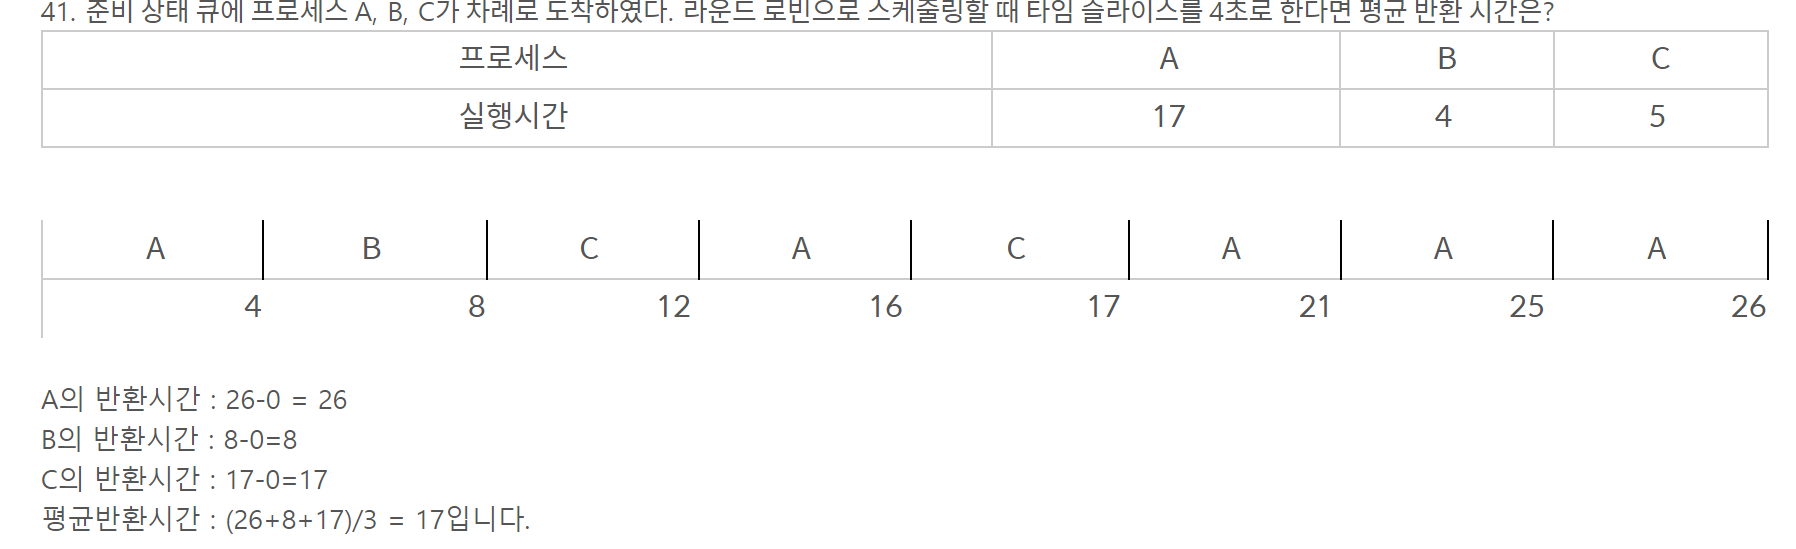

###### ==> Round RobinÏóê ÎåÄÌïú Í∞ÑÎã®Ìïú ÏÑ§Î™Ö

In [38]:
from sklearn.experimental import enable_iterative_imputer#ÏïÑÏßÅ Ïã§ÌóòÎ≤ÑÏ†ÑÏù¥Ïó¨ÏÑú Ïù¥Î†áÍ≤å ÎÇòÏò¥ „Ö†„Ö†
from sklearn.impute import IterativeImputer #Î∞ëÏóê markdownÍ≥º ÎπÑÍµê

from sklearn.preprocessing import MinMaxScaler, StandardScaler 

sdscaler = StandardScaler()

In [39]:
impute_df = data.copy()

In [40]:
imp_mean = IterativeImputer(random_state=0)#Ïù¥Î†áÍ≤å Í∞ùÏ≤¥Î•º ÎßåÎì†Îã§
impute_df[num_columns] = imp_mean.fit_transform(impute_df[num_columns])#fitÍ≥º transformÏùÑ ÌïúÎ≤àÏóê ÌïòÎäîÍ≤É!!

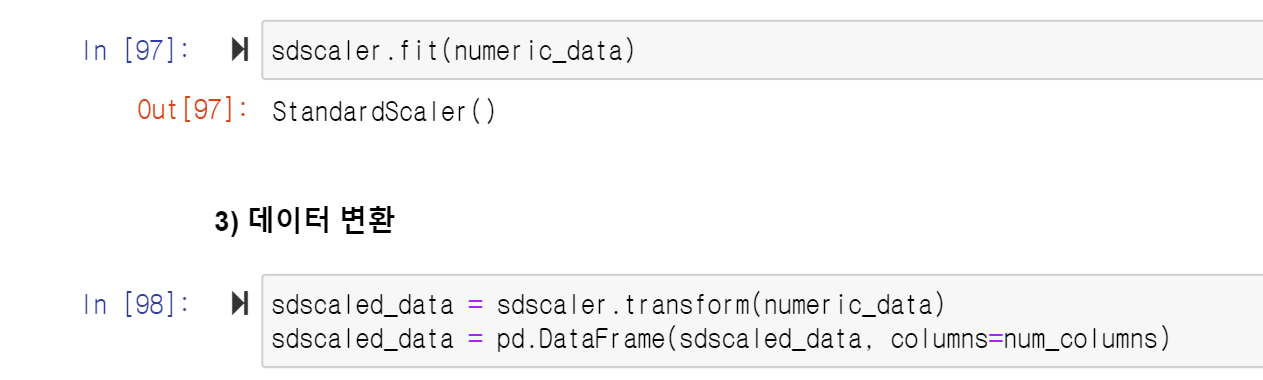

In [41]:
pd.isna(impute_df[num_columns]).sum().sum()

0

### 4. Mode(ÏµúÎπàÍ∞í)
ÏµúÎπàÍ∞íÏùÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÏóêÏÑú Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Í∞íÏùÑ ÎßêÌï©ÎãàÎã§.<br>

In [42]:
mode_df = data.copy()

In [43]:
for c in cat_columns:
    mode_df.loc[pd.isna(data[c]), c] = data[c].mode()[0] #ÏùºÏºÄ Îí§Ïóê"[0]"Î∂ôÎäîÍ≤É Í±ç ÏïîÍ∏∞!!

In [44]:
pd.isna(mode_df[cat_columns]).sum()

sido           0
instkind       0
ownerChange    0
dtype: int64

# Dimensionality Reduction
## Ï∞®Ïõê Ï∂ïÏÜåÎäî Ïôú Ìï¥ÏïºÌï†ÍπåÏöî? - Ï∞®ÏõêÏùò Ï†ÄÏ£º
Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎäî Ï†ÄÏ∞®ÏõêÏóêÏÑúÎäî ÏùºÏñ¥ÎÇòÏßÄ ÏïäÎäî ÌòÑÏÉÅÎì§Ïù¥ Í≥†Ï∞®ÏõêÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ±∞ÎÇò Îã§Î£∞ Îïå ÏÉùÍ≤®ÎÇòÎäî ÌòÑÏÉÅÏùÑ ÎßêÌï©ÎãàÎã§.<br>
Í≥†Ï∞®ÏõêÏúºÎ°ú Ïò¨ÎùºÍ∞à ÏàòÎ°ù Í≥µÍ∞ÑÏùò ÌÅ¨Í∏∞Í∞Ä Ï¶ùÍ∞ÄÌïòÍ≤å ÎêòÎäîÎç∞, Îç∞Ïù¥ÌÑ∞Îäî Ìï¥Îãπ Í≥µÍ∞ÑÏóê ÌïúÏ†ïÏ†ÅÏúºÎ°ú ÏúÑÏπòÎêòÏñ¥ Îπà Í≥µÍ∞ÑÏù¥ ÎßéÏïÑÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê Î∞úÏÉùÌï©ÎãàÎã§.<br>
Ïù¥Îü¨Ìïú Ïù¥Ïú†Î°ú Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®ÏõêÏù¥ ÎÑàÎ¨¥ ÌÅ∞ Í≤ΩÏö∞ÏóêÎäî ÌïÑÏöîÏóÜÎäî Î≥ÄÏàòÎ•º Ï†úÍ±∞ÌïòÍ≥†, Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌï©ÎãàÎã§. <br>
ÎòêÎäî, ÏÇ¨ÎûåÏù¥ Ïù∏ÏãùÌï† Ïàò ÏûàÎäî Ï∞®ÏõêÏùÄ 3Ï∞®ÏõêÏù¥ ÏµúÎåÄÏù¥ÎØÄÎ°ú Îç∞Ïù¥ÌÑ∞Ïùò ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌïòÍ∏∞ÎèÑ Ìï©ÎãàÎã§.

![CurseofDimensionality](./img/Curse_of_Dimensionality.png)

## Ï£º ÏÑ±Î∂Ñ Î∂ÑÏÑù (Principal Component Analysis, PCA)
ÎåÄÌëúÏ†ÅÏù∏ Ï∞®Ïõê Ï∂ïÏÜå Í∏∞Î≤ïÏúºÎ°ú Ï£º ÏÑ±Î∂Ñ Î∂ÑÏÑù(Ïù¥Ìïò, PCA)Ïù¥ÎùºÎäî Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§.<br>
PCAÎäî Ïó¨Îü¨ Ï∞®ÏõêÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏû• Ïûò ÌëúÌòÑÌïòÎäî Ï∂ïÏúºÎ°ú Projection Ìï¥ÏÑú Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌïòÎäî Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.<br>
Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏû• Ïûò ÌëúÌòÑÌïòÎäî Ï∂ïÏù¥ÎûÄ, Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞ÏùÑ Ïûò ÌëúÌòÑÌïòÎäî Ï∂ïÏù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§.<br>
Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï£ºÏÑ±Î∂Ñ(Principal Component, PC)ÏùÄ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ ÌäπÏù¥Í∞í Î∂ÑÌï¥Î•º ÌÜµÌï¥ Ï∂îÏ∂úÎêú Í≥†Ïú† Î≤°ÌÑ∞ÏûÖÎãàÎã§.<br>
Í∞Å Í≥†Ïú† Î≤°ÌÑ∞Îì§ÏùÄ ÏÑúÎ°ú ÏßÅÍµêÏÑ±ÏùÑ ÎùÑÍ∏∞ ÎïåÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞Î•º Ï£ºÏÑ±Î∂Ñ Î≤°ÌÑ∞Î°ú ÏÇ¨ÏòÅ(Projection) ÏãúÌÇ§Î©¥ ÏÑúÎ°ú ÎèÖÎ¶ΩÏ†ÅÏù∏ Î≥ÄÏàòÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§.<br>
PCAÏùò Îã®Ï†êÏúºÎ°úÎäî Îñ®Ïñ¥Îú®Î¶∞ Ï£ºÏÑ±Î∂ÑÏù¥ Ïñ¥Îñ§ Ïª¨ÎüºÏù∏ÏßÄÎ•º ÏÑ§Î™ÖÌï† Ïàò ÏóÜÎã§Îäî Ï†êÏù¥ ÏûàÏäµÎãàÎã§. 

#### Ï£º ÏÑ±Î∂Ñ Î∂ÑÏÑùÏùò Îã®Í≥Ñ
1. Í∞Å Ïª¨ÎüºÎì§Ïùò Í∞íÏùò Î≤îÏúÑÎ•º ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º ÏÇ¨Ïö©Ìï¥ ÌëúÏ§Ä Ï†ïÍ∑úÌôîÏãúÏºú Î≥ÄÏàòÎì§Ïùò Î∂ÑÏÇ∞ÏùÑ ÎèôÏùºÌïòÍ≤å ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.
2. Îç∞Ïù¥ÌÑ∞Ïùò Í≥µÎ∂ÑÏÇ∞ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
3. Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨Ïóê ÎåÄÌï¥ ÌäπÏù¥Í∞í Î∂ÑÌï¥Î•º ÌïòÏó¨ Ï£ºÏÑ±Î∂Ñ(Í≥†Ïú† Î≤°ÌÑ∞)Í≥º Í≥†Ïú† Í∞íÏùÑ ÏñªÏñ¥ÎÉÖÎãàÎã§.
4. Ï£ºÏÑ±Î∂ÑÍ≥º ÎåÄÏùëÎêòÎäî Í≥†Ïú† Í∞íÏùÄ Ï£ºÏÑ±Î∂ÑÏù¥ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞ÏùÑ ÌëúÌòÑÌïòÎäî Ï†ïÎèÑÏùò Ï≤ôÎèÑÎ°ú ÏÇ¨Ïö©ÎêòÎØÄÎ°ú, Í≥†Ïú† Í∞íÏùò ÌÅ¨Í∏∞ÏôÄ ÎπÑÏú®ÏùÑ Î≥¥Í≥† Î™áÍ∞úÏùò Ï£ºÏÑ±Î∂ÑÏùÑ ÏÑ†ÌÉùÌï† Í≤ÉÏù∏ÏßÄ ÎòêÎäî ÏõêÌïòÎäî Ï∞®ÏõêÏùò Í∞úÏàòÎßåÌÅºÏùò Ï£ºÏÑ±Î∂ÑÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
5. ÏÑ†ÌÉùÌïú Ï£ºÏÑ±Î∂ÑÏúºÎ°ú Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ProjectionÏãúÏºú Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌï©ÎãàÎã§.

#### Projection(ÏÇ¨ÏòÅ)
ProjectionÏóê ÎåÄÌï¥ Í∞ÑÎã®Ìûà ÏßöÍ≥† ÎÑòÏñ¥Í∞ÄÍ≤†ÏäµÎãàÎã§. <br>
Î≤°ÌÑ∞ Í≥µÍ∞ÑÏóêÏÑú Ïñ¥Îñ§ Î≤°ÌÑ∞ aÏôÄ bÍ∞Ä ÏûàÏùÑ Îïå Î≤°ÌÑ∞ bÎ•º Î≤°ÌÑ∞ aÏóê ÏÇ¨ÏòÅÌïú Í≤∞Í≥º(x)Îäî ÏïÑÎûò Í∑∏Î¶ºÍ≥º Í∞ôÏäµÎãàÎã§.<br>
Î≤°ÌÑ∞ bÎ•º Î≤°ÌÑ∞ aÏóê ÏÇ¨ÏòÅÌïúÎã§Îäî Í≤ÉÏùÄ Î≤°ÌÑ∞ aÏóê ÎåÄÌï¥ ÏàòÏßÅÏù∏ Î∞©Ìñ•ÏúºÎ°ú Î≤°ÌÑ∞ bÎ•º Îñ®Ïñ¥Îú®Î¶¨Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.<br>
Í∞ÑÎã®Ìûà ÎßêÌï¥ÏÑú, Î≤°ÌÑ∞ bÏùò Í∑∏Î¶ºÏûêÎ•º Î≤°ÌÑ∞ aÏóê Îñ®Ïñ¥Îú®Î¶∞ Í≤ÉÏùÑ ÏÉùÍ∞ÅÌïòÏãúÎ©¥ Ìé∏Ìï©ÎãàÎã§.

![Projection](./img/Projection.png)

PCAÏùò Í∏∞Î≥∏ ÏõêÎ¶¨Îäî Î≥ÄÏàòÏùò Î∂ÑÏÇ∞ÏùÑ Í∞ÄÏû• Ïûò ÌëúÌòÑÌïòÎäî Î≤°ÌÑ∞(Ï∂ï)Î•º Ï∞æÏïÑ Ìï¥Îãπ Î≤°ÌÑ∞Ïóê Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ ÏÇ¨ÏòÅ ÏãúÌÇ§Îäî Í≤ÉÏûÖÎãàÎã§.

https://angeloyeo.github.io/2019/07/27/PCA.html  

Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù ÏÑ§Î™Ö

In [45]:
from sklearn.datasets import load_digits #mnist dataÏôÄ Ïú†ÏÇ¨
digits = load_digits()

Ïù¥Î≤àÏóêÎäî sklearnÏùò ÎÇ¥Ïû• Îç∞Ïù¥ÌÑ∞Ïù∏, 64Ï∞®Ïõê(8\*8) digit(Ïà´Ïûê Ïù¥ÎØ∏ÏßÄ)Îç∞Ïù¥ÌÑ∞Î•º pcaÎ•º ÌÜµÌï¥ 2Ï∞®ÏõêÏúºÎ°ú Îñ®Ïñ¥Îú®Î†§ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [46]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [47]:
data = digits.data
label = digits.target

In [48]:
data.shape

(1797, 64)

Ïà´Ïûê Ïù¥ÎØ∏ÏßÄÍ∞Ä 64 Ï∞®Ïõê Î≤°ÌÑ∞Î°ú ÌëúÌòÑÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî (8,8) ÌñâÎ†¨Î°ú Î≥ÄÌôòÌï¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.

Label : 0


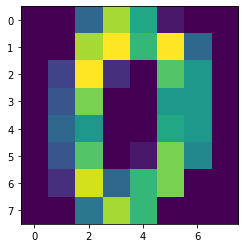

In [50]:
import matplotlib.pyplot as plt
plt.imshow(data[0].reshape((8,8)))#64Ï∞®ÏõêÏûÑ
print('Label : {}'.format(label[0]))

0Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ÏßÄ ÏÉÅÏúºÎ°ú 0ÏúºÎ°ú Î≥¥Ïù¥Í≥†, ÎùºÎ≤®ÎèÑ 0Ïù∏ Í≤ÉÏùÑ ÌôïÏù∏ÌïòÏòÄÏäµÎãàÎã§.<br>
pcaÎ•º ÌÜµÌï¥ 64Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Î•º 2Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Î°ú Ï∞®ÏõêÏùÑ Ï∂ïÏÜå ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.<br>
cf)64Ï∞®Ïõê -> 2Ï∞®Ïõê Ï∂ïÏÜå Ï§ëÍ∞ÑÏóê standard scalingÌïúÎ≤à Ìï¥Ï§ÄÎã§

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#### 1) Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ïÏùòÌïòÍ∏∞

In [52]:
from sklearn.decomposition import PCA
# n_componentsÏóê Ï†ïÏàòÎ•º ÏûÖÎ†•ÌïòÎ©¥, Ï£ºÏÑ±Î∂ÑÏùò Í∞úÏàòÎ•º ÏûÖÎ†•Ìï† Ïàò ÏûàÎäî Í≤ÉÏù¥Í≥†,
#Ïã§ÏàòÎ•º ÏûÖÎ†•ÌïòÎ©¥, Ï£ºÏÑ±Î∂ÑÏùò Í≥†Ïú†Í∞íÏù¥ Îç∞Ïù¥ÌÑ∞Ïùò 80% Ïù¥ÏÉÅÏùÑ Í≥†Î•∏Îã§#Ïã§ÏàòÎäî Î≥¥ÌÜµ 0.9Î°ú ÎëîÎã§
pca = PCA(n_components=2)

#### 2) Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌäπÏßï Ï∞æÍ∏∞ (Ï£º ÏÑ±Î∂Ñ Ï∞æÍ∏∞)

In [53]:
pca.fit(scaled_data)

PCA(n_components=2)

#### 3) Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò (Ï£º ÏÑ±Î∂ÑÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÇ¨ÏòÅÌïòÍ∏∞)

In [54]:
new_data = pca.transform(scaled_data)

#### 4) Í≤∞Í≥º ÏÇ¥Ìé¥Î≥¥Í∏∞

In [55]:
print('ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïõê \n{}'.format(data.shape))
print('\nPCAÎ•º Í±∞Ïπú Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïõê \n{}'.format(new_data.shape))

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïõê 
(1797, 64)

PCAÎ•º Í±∞Ïπú Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïõê 
(1797, 2)


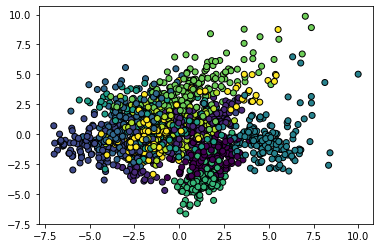

In [56]:
plt.scatter(new_data[:,0], new_data[:, 1], c=label, linewidth=1, edgecolor='black')
plt.show() #Î∞ëÏóê 2Ï∞®Ïõê ÌòïÌÉúÎ°ú Ï§ÑÏñ¥Îì†Í≤É ÌôïÏù∏!!!

# Categorical Variable to Numeric Variable 
Ïù¥Î≤àÏóêÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏàòÏπòÌòï Î≥ÄÏàòÎ°ú ÎÇòÌÉÄÎÇ¥Îäî Î∞©Î≤ïÏóê ÎåÄÌï¥ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§. <br>
Ïó¨Í∏∞ÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎûÄ, Ï∞®Ïùò Îì±Í∏âÏùÑ ÎÇòÌÉÄÎÇ¥Îäî [ÏÜåÌòï, Ï§ëÌòï, ÎåÄÌòï] Ï≤òÎüº ÌëúÌòÑÎêòÎäî Î≥ÄÏàòÎ•º ÎßêÌï©ÎãàÎã§. <br>
Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Ï£ºÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÉÅÏóêÏÑú Î¨∏ÏûêÏó¥Î°ú ÌëúÌòÑÎêòÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏúºÎ©∞, Î¨∏ÏûêÏôÄ Ïà´ÏûêÍ∞Ä Îß§ÌïëÎêòÎäî ÌòïÌÉúÎ°ú ÌëúÌòÑÎêòÍ∏∞ÎèÑ Ìï©ÎãàÎã§.<br>

## 1. Label Encoding
ÎùºÎ≤® Ïù∏ÏΩîÎî©ÏùÄ nÍ∞úÏùò Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º 0~n-1 Ïùò Ïó∞ÏÜçÏ†ÅÏù∏ ÏàòÏπò Îç∞Ïù¥ÌÑ∞Î°ú ÌëúÌòÑÌï©ÎãàÎã§.<br>
ÏòàÎ•º Îì§Ïñ¥, Ï∞®Ïùò Îì±Í∏â Î≥ÄÏàòÎ•º ÎùºÎ≤® Ïù∏ÏΩîÎî©ÏúºÎ°ú Î≥ÄÌôòÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§.<br>
ÏÜåÌòï : 0 <br>
Ï§ëÌòï : 1 <br>
ÎåÄÌòï : 2 <br>
ÎùºÎ≤® Ïù∏ÏΩîÎî©ÏùÄ Í∞ÑÎã®Ìïú Î∞©Î≤ïÏù¥ÏßÄÎßå, 'ÏÜåÌòï'Í≥º 'Ï§ëÌòï'Ïù¥ÎùºÎäî Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ÄÏßÄÍ≥† ÏûàÎäî Ï∞®Ïù¥Í∞Ä 0Í≥º 1Ïùò ÏàòÏπòÏ†ÅÏù∏ Ï∞®Ïù¥ÎùºÎäî ÏùòÎØ∏Í∞Ä ÏïÑÎãòÏùÑ Ï£ºÏùòÌïòÏÖîÏïº Ìï©ÎãàÎã§. 

Label EncodingÍ≥º SklearnÏùò preprocessing Ìå®ÌÇ§ÏßÄÏóê ÏûàÏäµÎãàÎã§.<br>
Ïù¥Î≤àÏóêÎäî Î≥ëÏõê Í∞ú/ÌèêÏóÖ Îç∞Ïù¥ÌÑ∞Ïùò targetÏù¥ÏóàÎçò, OC Î≥ÄÏàòÎ•º ÏàòÏπòÌòï Î≥ÄÏàòÎ°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.

In [57]:
data = pd.read_csv(example_file)
label = data['OC']

label.head()

0    open
1    open
2    open
3    open
4    open
Name: OC, dtype: object

#### 1) Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ïÏùòÌïòÍ∏∞

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### 2) Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌäπÏßï Ï∞æÍ∏∞ (Î≤îÏ£ºÏùò Ïàò)

In [59]:
le.fit(label)

LabelEncoder()

In [60]:
le.classes_ #closeÍ∞Ä ÏïûÏóê ÏûàÏúºÎØÄÎ°ú closeÎäî 0ÏúºÎ°ú encoding, openÏù¥ 1Î°ú encoding

array([' close', 'open'], dtype=object)

#### 3) Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò (Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏàòÏπòÌòï Î≥ÄÏàòÎ°ú)

In [61]:
label_encoded = le.transform(label)

#### 4) Í≤∞Í≥º ÏÇ¥Ìé¥Î≥¥Í∏∞

In [62]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), label_encoded.reshape((-1, 1))], axis=1), 
                      columns=['label', 'label_encoded'])
result.sort_values('label_encoded', inplace=True)
result.head(20)

label label_encoded
261   close             0
177   close             0
93    close             0
212   close             0
214   close             0
141   close             0
71    close             0
290   close             0
35    close             0
158   close             0
298   close             0
193   close             0
111   close             0
297   close             0
299   close             0
201    open             1
200    open             1
199    open             1
197    open             1
194    open             1

## 2. One-hot Encoding
ÏõêÌï´ Ïù∏ÏΩîÎî©ÏùÄ nÍ∞úÏùò Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º nÍ∞úÏùò ÎπÑÌä∏(0,1) Î≤°ÌÑ∞Î°ú ÌëúÌòÑÌï©ÎãàÎã§. <br>
ÏòàÎ•º Îì§Ïñ¥, ÏúÑÏóêÏÑú Ïñ∏Í∏âÌïú ÏÜåÌòï, Ï§ëÌòï, ÎåÄÌòïÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏõêÌï´ Ïù∏ÏΩîÎî©ÏùÑ ÌÜµÌï¥ Î≥ÄÌôòÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§.<br>
ÏÜåÌòï : [1, 0, 0] <br>
Ï§ëÌòï : [0, 1, 0] <br>
ÎåÄÌòï : [0, 0, 1] <br>
ÏõêÌï´ Ïù∏ÏΩîÎî©ÏúºÎ°ú Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÌÉÄÎÇ¥Í≤åÎêòÎ©¥, ÏÑúÎ°ú Îã§Î•∏ Î≤îÏ£ºÏóê ÎåÄÌï¥ÏÑúÎäî Î≤°ÌÑ∞ ÎÇ¥Ï†ÅÏùÑ Ï∑®ÌñàÏùÑ Îïå ÎÇ¥Ï†Å Í∞íÏù¥ 0Ïù¥ ÎÇòÏò§Í≤å Îê©ÎãàÎã§. <br> 
Ïù¥Îäî ÏÑúÎ°ú Îã§Î•∏ Î≤îÏ£º Îç∞Ïù¥ÌÑ∞Îäî ÎèÖÎ¶ΩÏ†ÅÏù∏ Í¥ÄÍ≥ÑÎùºÎäî Í≤ÉÏùÑ ÌëúÌòÑÌï† Ïàò ÏûàÍ≤å Îê©ÎãàÎã§.

One-hot EncodingÏùÄ SklearnÏùò preprocessing Ìå®ÌÇ§ÏßÄÏóê ÏûàÏäµÎãàÎã§.

SklearnÏùò One-hot EncoderÎäî numpy ÌñâÎ†¨Î°ú ÏûÖÎ†•ÏùÑ ÎÑ£Ïñ¥Ï§òÏïº Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏûëÎèôÌïòÎØÄÎ°ú, pandas DataFrameÏóêÏÑú numpy-arrayÎ°ú Ï∂îÏ∂úÌïòÏó¨ ÏÇ¨Ïö©Ìï©ÎãàÎã§.


#### 1) Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ïÏùòÌïòÍ∏∞

In [63]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)#Î∞ëÏóê for study ÏôÄ ÎπÑÍµê!!, Í∑∏Î¶¨Í≥† Î∞ëÏóê 3)Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò Ï™ΩÏóêÏÑú ÎëêÍ∞ú ÎπÑÍµêÌï®.
for_study = OneHotEncoder()

sparse = TrueÎ•º ÌïòÎ©¥ sparse matrixÎ•º Ïì¥Îã§Í≥† ÌïòÎäîÍ≤ÉÏù¥Îã§<br> ÎßåÏïΩ, categoryÍ∞úÏàòÍ∞Ä 5000Í∞úÏù∏Îç∞ one-hot encodingÏùÑ Ìï¥ÏïºÌïúÎã§Í≥† Í∞ÄÏ†ïÌï¥Î≥¥Ïûê, Í∑∏Îü¨Î©¥ "100000...0, 01000...0,... " Ïù¥Î†áÍ≤å categoryÍ∞Ä ÎÇòÏò§ÎäîÎç∞, 5000Í∞úÏ§ë 4999Í∞úÍ∞Ä Îã§ 0Ïù¥Í≥†, Îî± 1Í∞úÎßå 1Ïù¥Îã§.<br>Í∑∏Îü¨ÎØÄÎ°ú Î©îÎ™®Î¶¨ ÎÇ≠ÎπÑÍ∞Ä Îß§Ïö∞ Ïã¨ÌïúÎç∞, Ïù¥Îïå sparse = trueÎ°ú Ìï¥ÎëêÎ©¥, Îî∞Î°ú sparse matrixÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú, 1Ïùò ÏúÑÏπòÎßå Îî∞Î°ú Ï†ÄÏû•Ìï¥ÎëîÎã§. ex)100000...0 =>1Î°ú Ï†ÄÏû•, 01000...0=>2Î°úÏ†ÄÏû•
<br>ÌïòÏßÄÎßå, Ïù¥Î†áÍ≤å categoryÍ∞Ä ÎßéÏùÄ Í≤ΩÏö∞Îäî Í±∞Ïùò ÏóÜÎã§. Í∑∏Îü¨ÎØÄÎ°ú Í∑∏ÎÉ• sparse = falseÎ°ú Ìï¥ÎëîÎã§ Î≥¥ÌÜµÏùò Í≤ΩÏö∞Ïóê

#### 2) Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌäπÏßï Ï∞æÍ∏∞ (Î≤îÏ£ºÏùò Ïàò)

In [64]:
ohe.fit(label.values.reshape((-1, 1)))# =>Ïù¥Í±¥, labelÏùÑ ÏùºÎã® valuesÎ°ú ÎΩëÏúºÎ©¥, (301,) vectorÍ∞Ä ÎÇòÏò§Í≥†, Í∑∏Í≤ÉÏùÑ reshape(-1,1)Î°ú Ìï¥Ï§òÏÑú ÎÑ£Ïñ¥Ï§òÏïº
#one hot ÏóêÏÑúÎäî Ïò§Î•òÍ∞Ä ÏïàÏÉùÍπÄ. Ïù¥Í±¥ one-hotÏóêÏÑúÎßå ÏÉùÍ∏∞Îäî Î¨∏Ï†úÎ°ú, ÏïÑÏßÅ sklearnÏù¥ Îã§ ÏôÑÏÑ±ÎêòÏßÄ ÏïäÏïÑÏÑú ÏÉùÍ∏∞Îäî Î¨∏Ï†ú
#(-1,1)ÏóêÏÑú -1ÏùÄ nÍ∞úÏùò Ï∞®Ïõê Ï§ë n-1Í∞úÎäî ÏÇ¨Ïö©ÏûêÍ∞Ä ÏßÄÏ†ïÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎäî ÏïåÏïÑÏÑú Í∞ÄÎä•Ìïú Ï∞®ÏõêÏóê ÎßûÏ∂îÎùºÎäî ÏùòÎØ∏ÏûÖÎãàÎã§.
for_study.fit(label.values.reshape((-1, 1)))

OneHotEncoder()

#### 3) Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò (Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏàòÏπòÌòï Î≥ÄÏàòÎ°ú)

In [65]:
one_hot_encoded = ohe.transform(label.values.reshape((-1,1)))
one_hot_encoded #Î∞ëÏóê ÏΩîÎìúÏôÄ ÎπÑÍµêÌïòÍ∏∞!!

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [66]:
one_hot_encoded_for_study = for_study.transform(label.values.reshape((-1,1)))
one_hot_encoded_for_study

<301x2 sparse matrix of type '<class 'numpy.float64'>'
	with 301 stored elements in Compressed Sparse Row format>

#### 4) Í≤∞Í≥º ÏÇ¥Ìé¥Î≥¥Í∏∞

In [67]:
columns = np.concatenate([np.array(['OC']) , ohe.categories_[0]])
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), one_hot_encoded.reshape((-1, 2))], axis=1), 
                      columns=columns)
result.head(10)

OC  close open
0  open      0    1
1  open      0    1
2  open      0    1
3  open      0    1
4  open      0    1
5  open      0    1
6  open      0    1
7  open      0    1
8  open      0    1
9  open      0    1

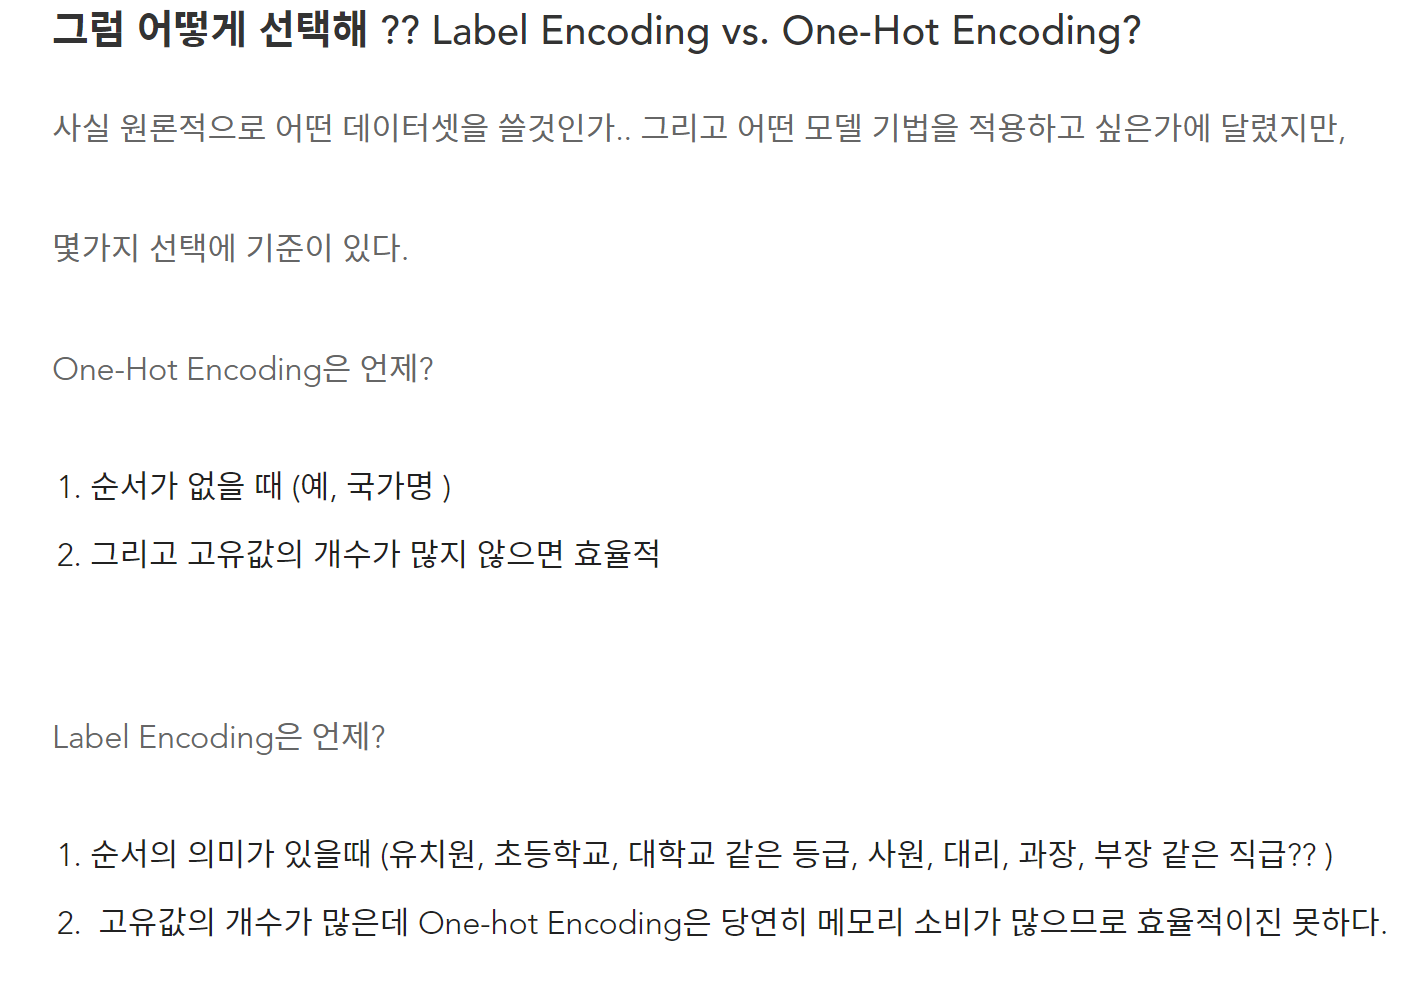

### Reference
- Î≥ëÏõê Í∞ú/ÌèêÏóÖ Îç∞Ïù¥ÌÑ∞ÏÖã Dacon: https://dacon.io/competitions/official/9565/overview/
- UCI repository, Adult DataSet : https://archive.ics.uci.edu/ml/datasets/adult
- Wikipedia, z-score : https://ko.wikipedia.org/wiki/ÌëúÏ§Ä_Ï†êÏàò 
- Curse of Dimension - https://wikidocs.net/7646
- Wikipedia, PCA - https://ko.wikipedia.org/wiki/Ï£ºÏÑ±Î∂Ñ_Î∂ÑÏÑù 
- Sklearn, Digits dataset : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html&sa=U&ved=0ahUKEwj334uTxODhAhWFgrwKHQBgDd4QFggQMAY&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw3dwyCabB7mxD5cEn2odXbC
- Sklearn, Min-Max Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 
- Sklearn, Standard Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 
- Sklearn, IterativeImputer : https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
- Sklearn, PCA : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA
- Sklearn, Label Encoder : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=label%20encoder#sklearn.preprocessing.LabelEncoder
- Sklearn, Onehot Encoder : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehot%20encoder#sklearn.preprocessing.OneHotEncoder